# 1.data cleaning and processing

In [1]:
# import modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None #Display complete print data
pd.options.display.max_rows = None
plt.rcParams['axes.unicode_minus']=False    # Used to display the negative sign normally
plt.rcParams['figure.dpi'] = 150 # Modify image resolution
plt.rcParams.update({'font.size': 16}) #Modify the overall font size of the image
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn import ensemble
import xgboost as xgb # 1.5.0
import lightgbm as lgb # 2.2.3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #Codes as numbers
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import warnings
warnings.filterwarnings("ignore") # ingore warnings

In [2]:
# read data
data = pd.read_csv('housing.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [3]:
# shape of data
data.shape

(20433, 10)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

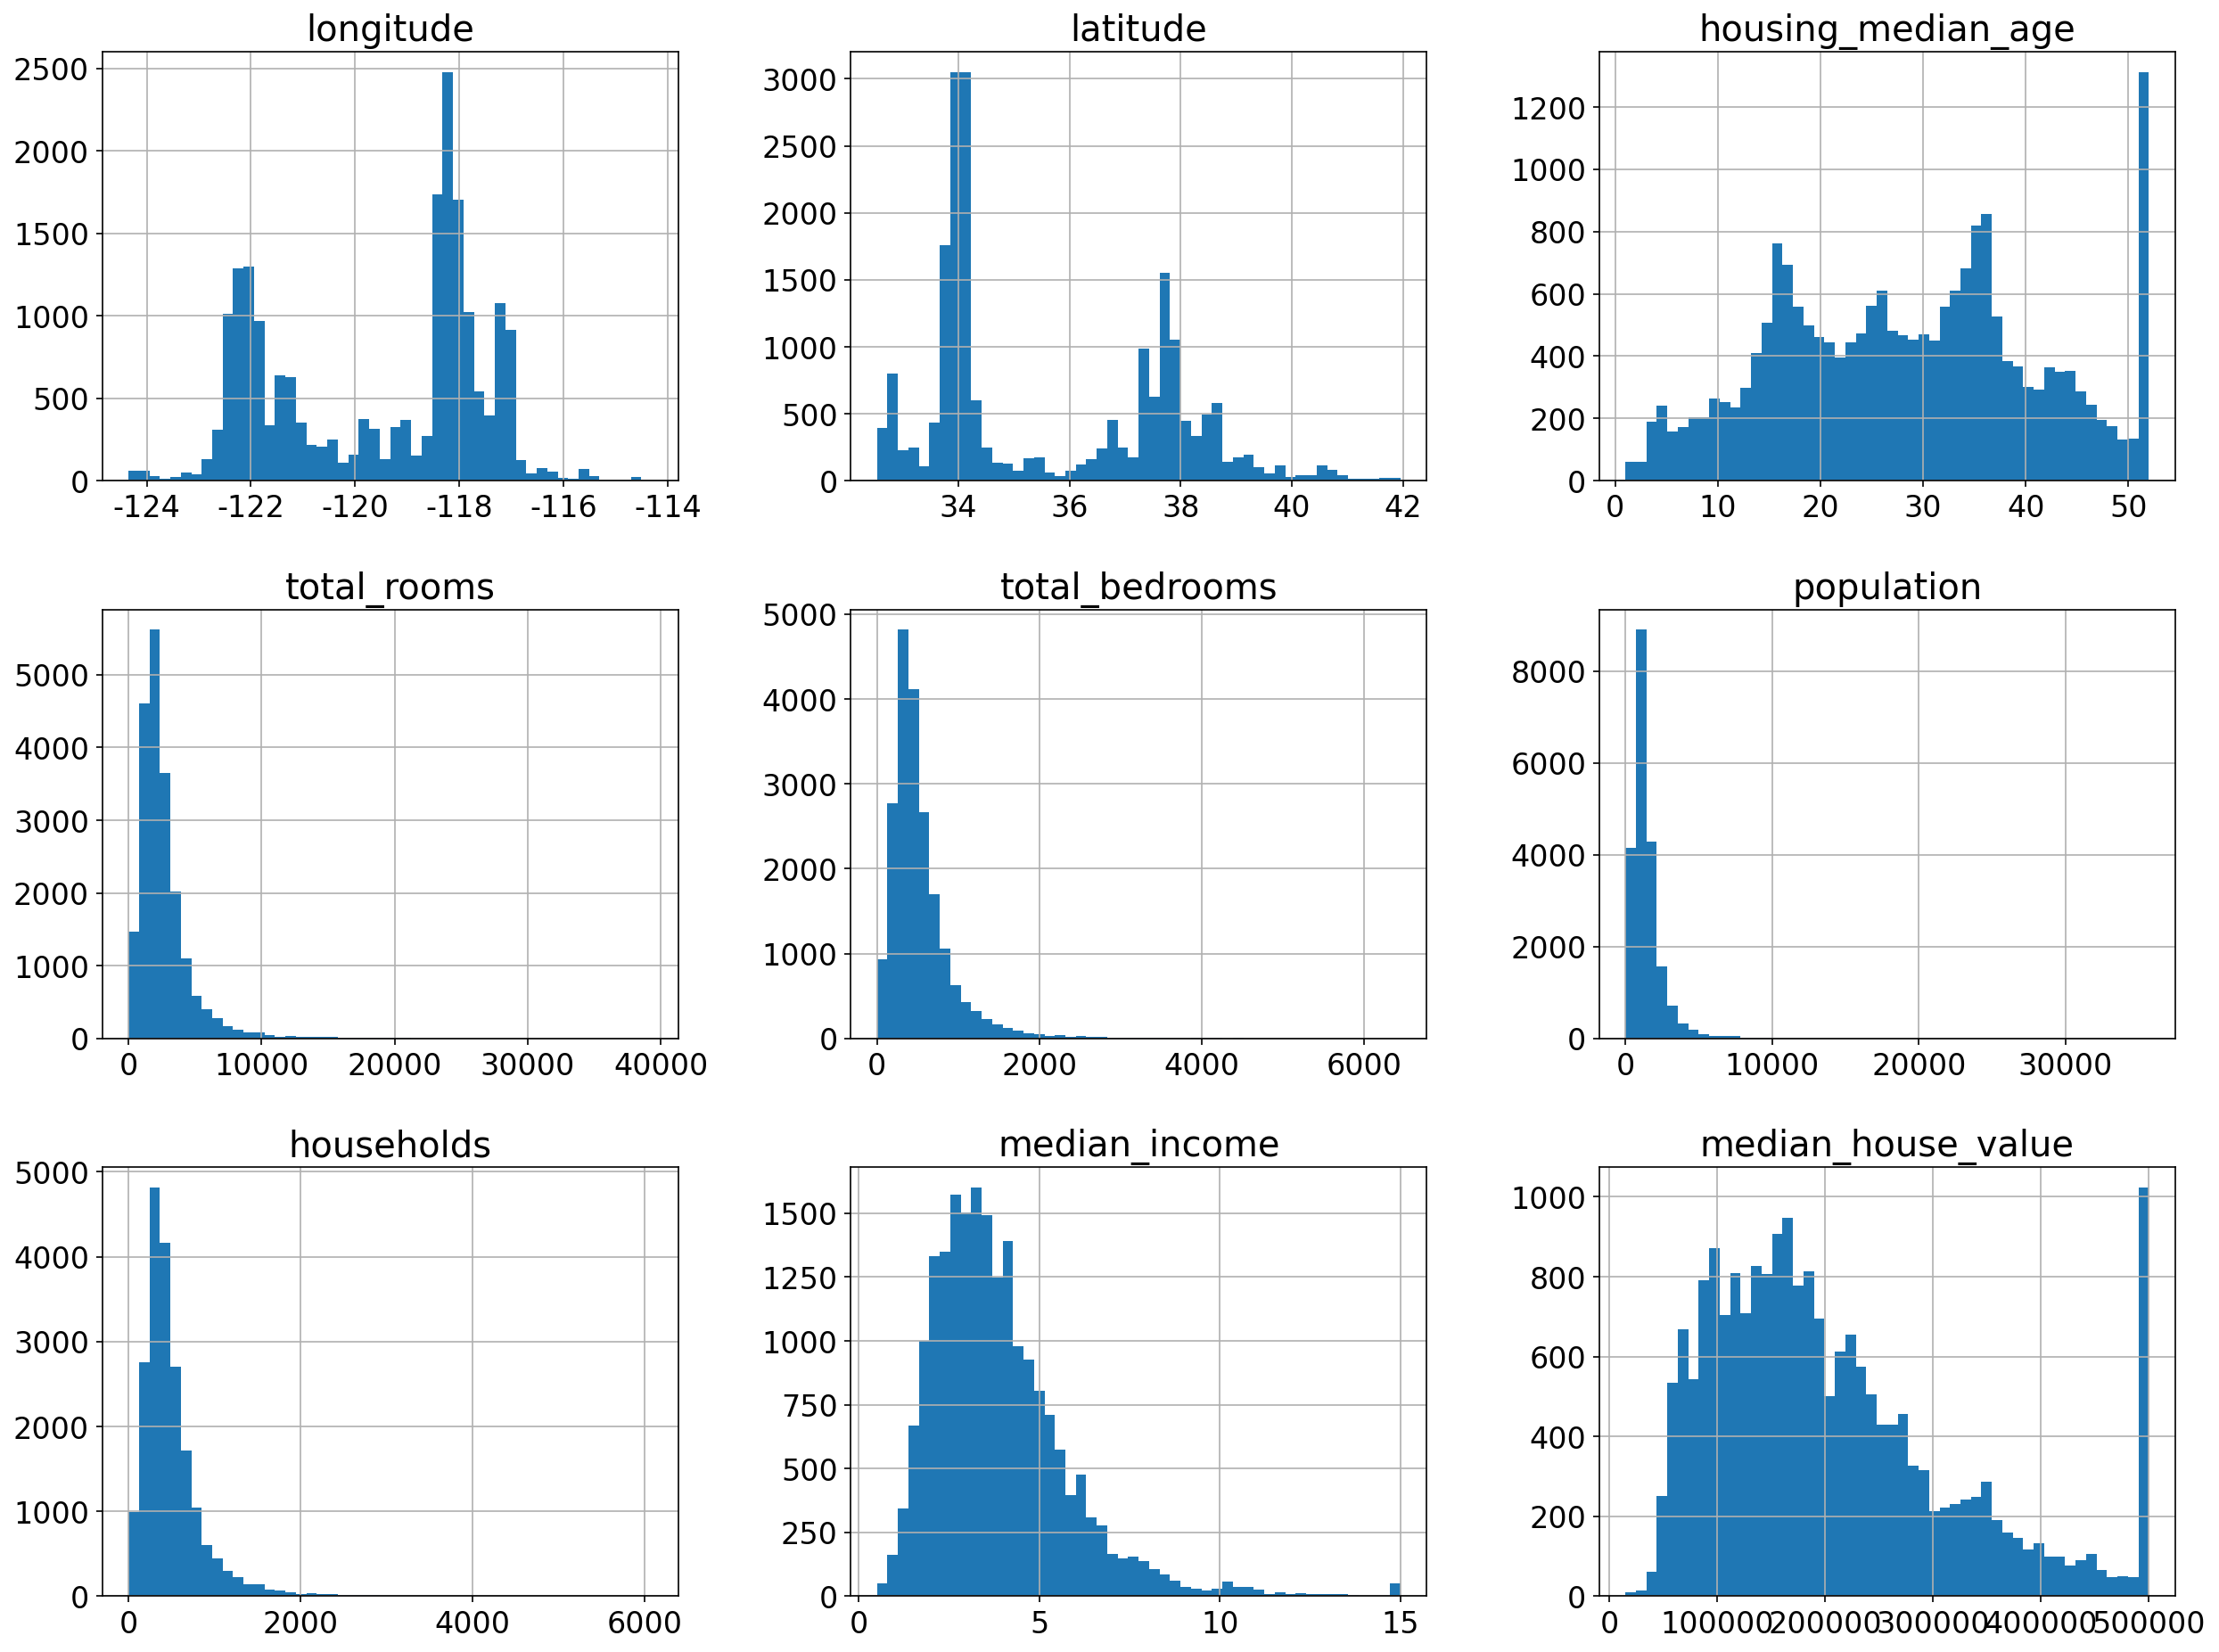

In [4]:
import matplotlib.pyplot as plt
# Draw histogram
data.hist(bins=50, figsize=(20,15))

In [5]:
#Numerical characterization
data.describe().T

count           mean            std         min  \
longitude           20433.0    -119.570689       2.003578   -124.3500   
latitude            20433.0      35.633221       2.136348     32.5400   
housing_median_age  20433.0      28.633094      12.591805      1.0000   
total_rooms         20433.0    2636.504233    2185.269567      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20433.0    1424.946949    1133.208490      3.0000   
households          20433.0     499.433465     382.299226      1.0000   
median_income       20433.0       3.871162       1.899291      0.4999   
median_house_value  20433.0  206864.413155  115435.667099  14999.0000   

                            25%          50%         75%          max  
longitude             -121.8000    -118.4900    -118.010    -114.3100  
latitude                33.9300      34.2600      37.720      41.9500  
housing_median_age      18.0000      29.0000      37.000      52.0000  
total_rooms           1450.0000    2127.0000    3143.000   39320.0000  
total_bedrooms         296.0000     435.0000     647.000    6445.0000  
population             787.0000    1166.0000    1722.000   35682.0000  
households             280.0000     409.0000     604.000    6082.0000  
median_income            2.5637       3.5365       4.744      15.0001  
median_house_value  119500.0000  179700.0000  264700.000  500001.0000

In [6]:
# # Check the number of missing values per column, no missing values
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

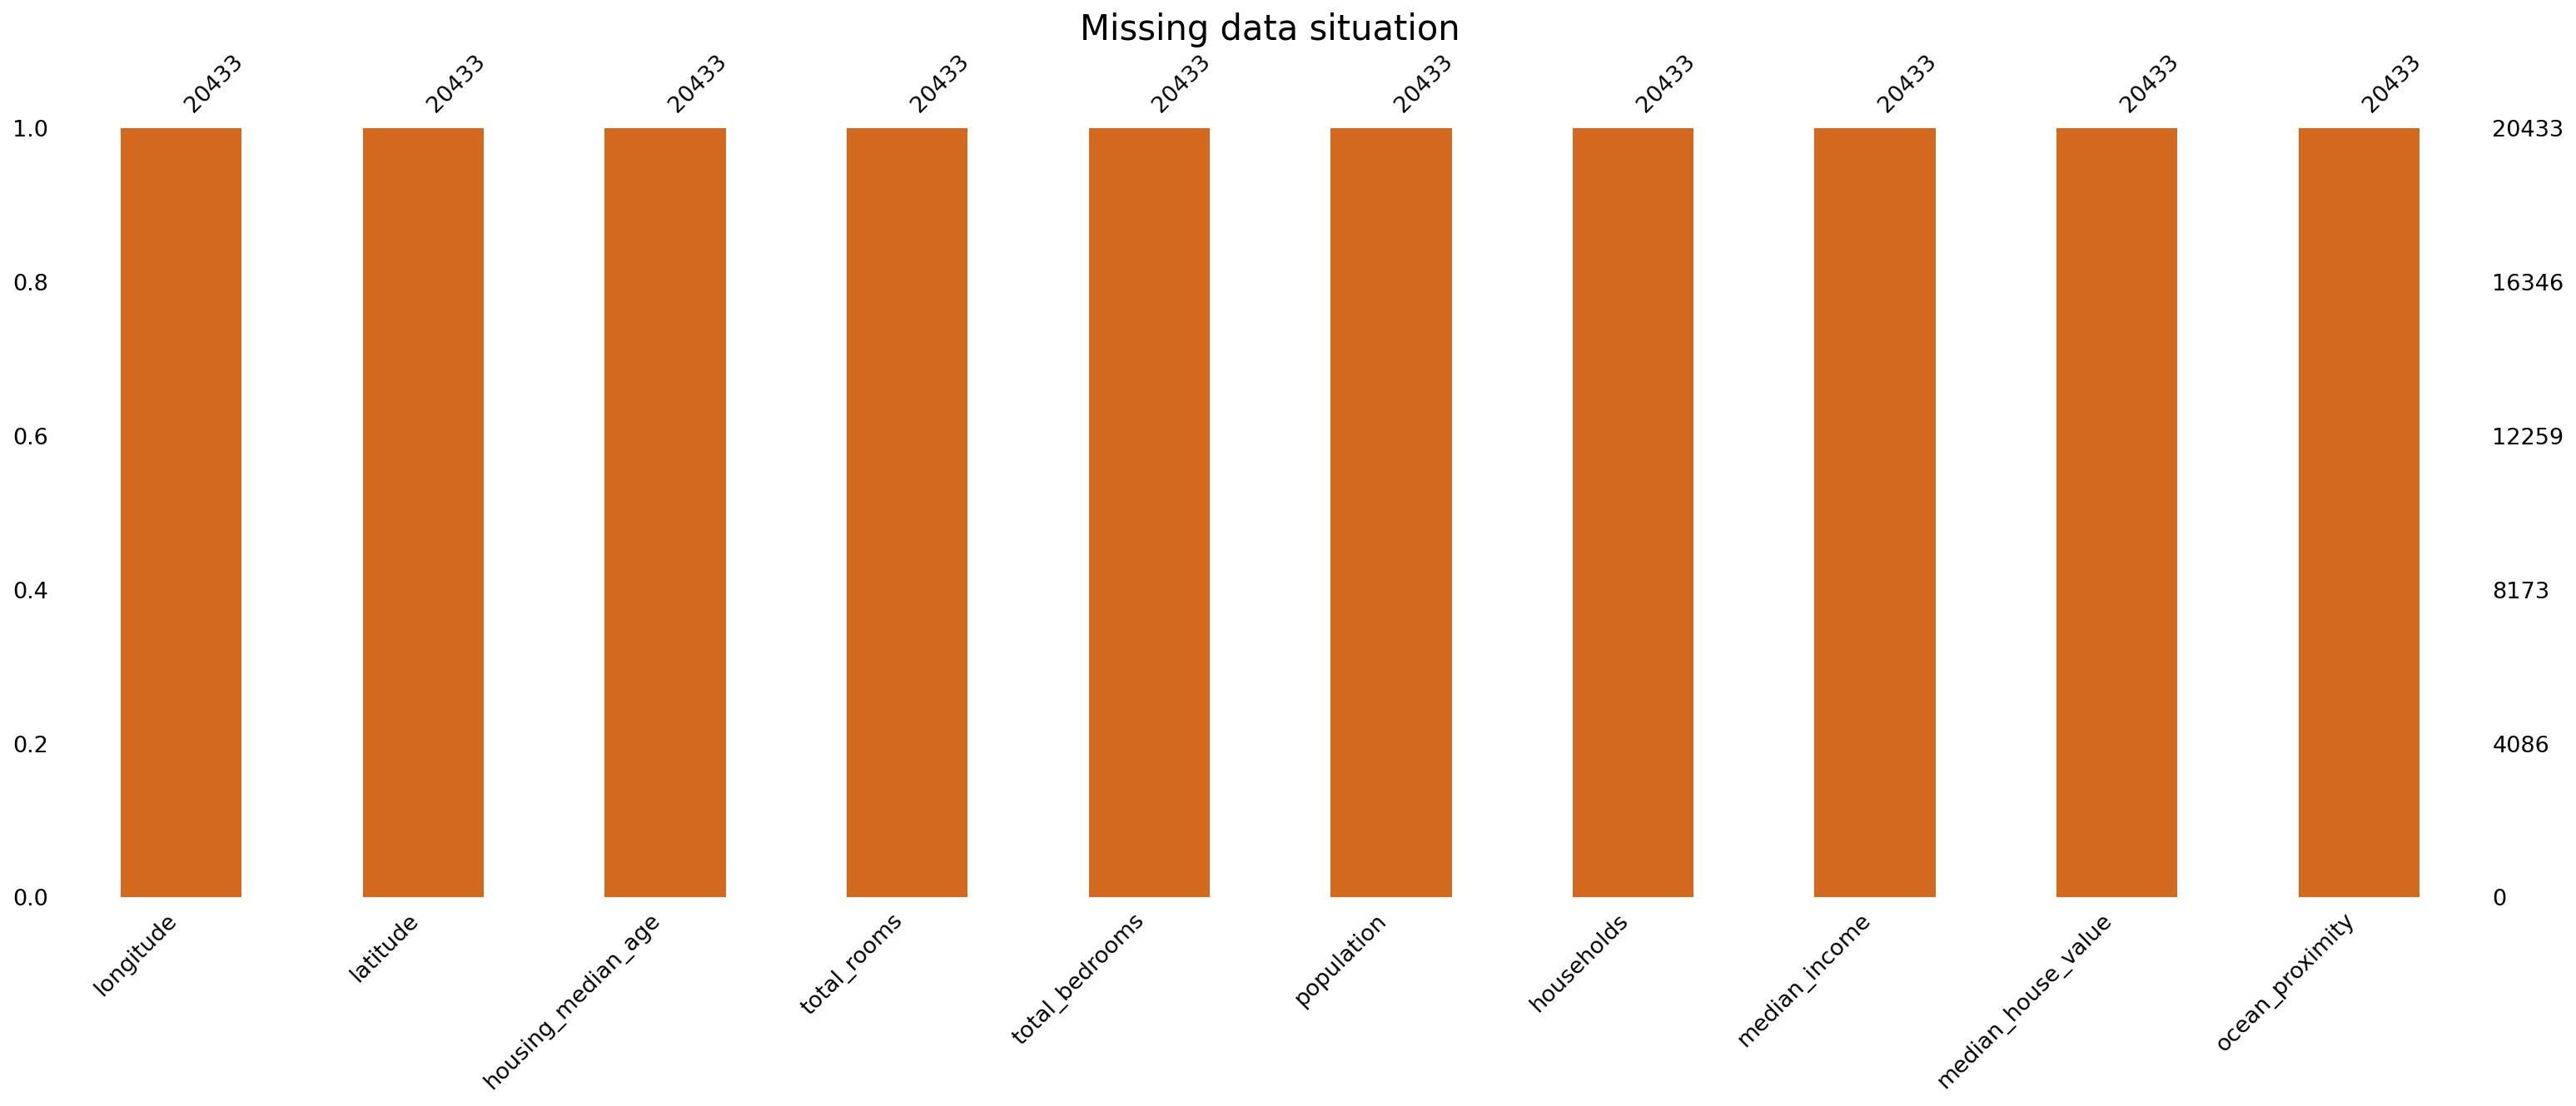

In [7]:
# Visualization of missing data
import missingno as msno
plt.figure(dpi=150)
p=msno.bar(data,color='chocolate',figsize=(25,8),fontsize=13)
plt.title('Missing data situation',fontsize=20)
plt.savefig('Missing data situation.png',dpi=300,bbox_inches = 'tight')# Saved as HD images

In [8]:
# View data type distribution
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [9]:
# Encoding string data
dtypes_list=data.dtypes.values
columns_list=data.columns
for i in range(len(columns_list)):
    if dtypes_list[i]=='object':#number
        lb=LabelEncoder()
        lb.fit(data[columns_list[i]])
        data[columns_list[i]]=lb.transform(data[columns_list[i]])
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value  ocean_proximity  
0         322         126         8.3252              452600                3  
1        2401        1138         8.3014              358500                3  
2         496         177         7.2574              352100                3  
3         558         219         5.6431              341300                3  
4         565         259         3.8462              342200                3

In [10]:
# Separate features and labels
# x = data.drop(['y1','y2','y3'],axis=1)
# y = data['y1']
x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [11]:
x.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  ocean_proximity  
0         322         126         8.3252                3  
1        2401        1138         8.3014                3  
2         496         177         7.2574                3  
3         558         219         5.6431                3  
4         565         259         3.8462                3

In [12]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [13]:
#  Data segmentation
# 7 to 3 divide the training set, test set, set random seed random_state, to ensure that the experiment can be reproduced

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=2022)

In [14]:
# Training set. Test set feature shape
x_train.shape,x_test.shape

((14303, 9), (6130, 9))

Text(0, 0.5, 'latitude')

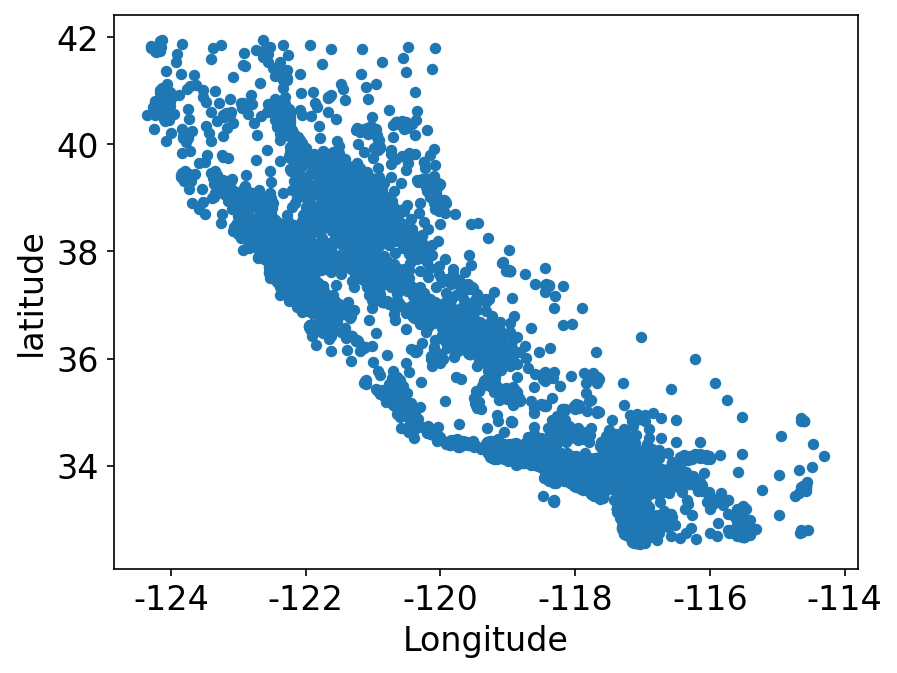

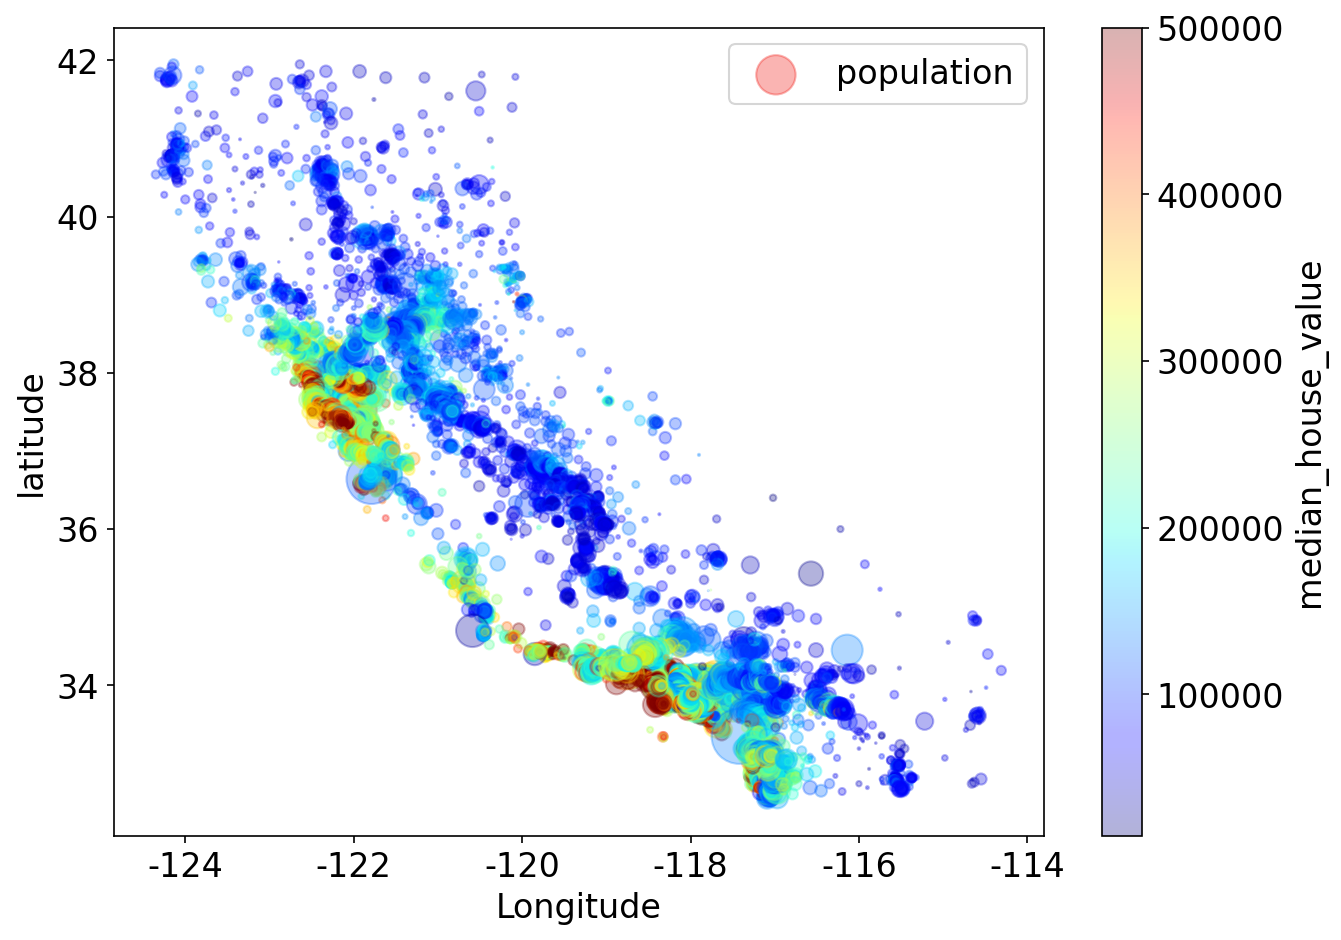

In [15]:
# Visualization of latitude and longitude

# Show negative sign
plt.rcParams['axes.unicode_minus'] = False

x.plot(kind="scatter", x="longitude", y="latitude")
plt.xlabel('Longitude')
plt.ylabel('latitude')


data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
             s=x["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('latitude')


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   
ocean_proximity     -0.289530  0.200801            0.112330    -0.015363   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude 

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

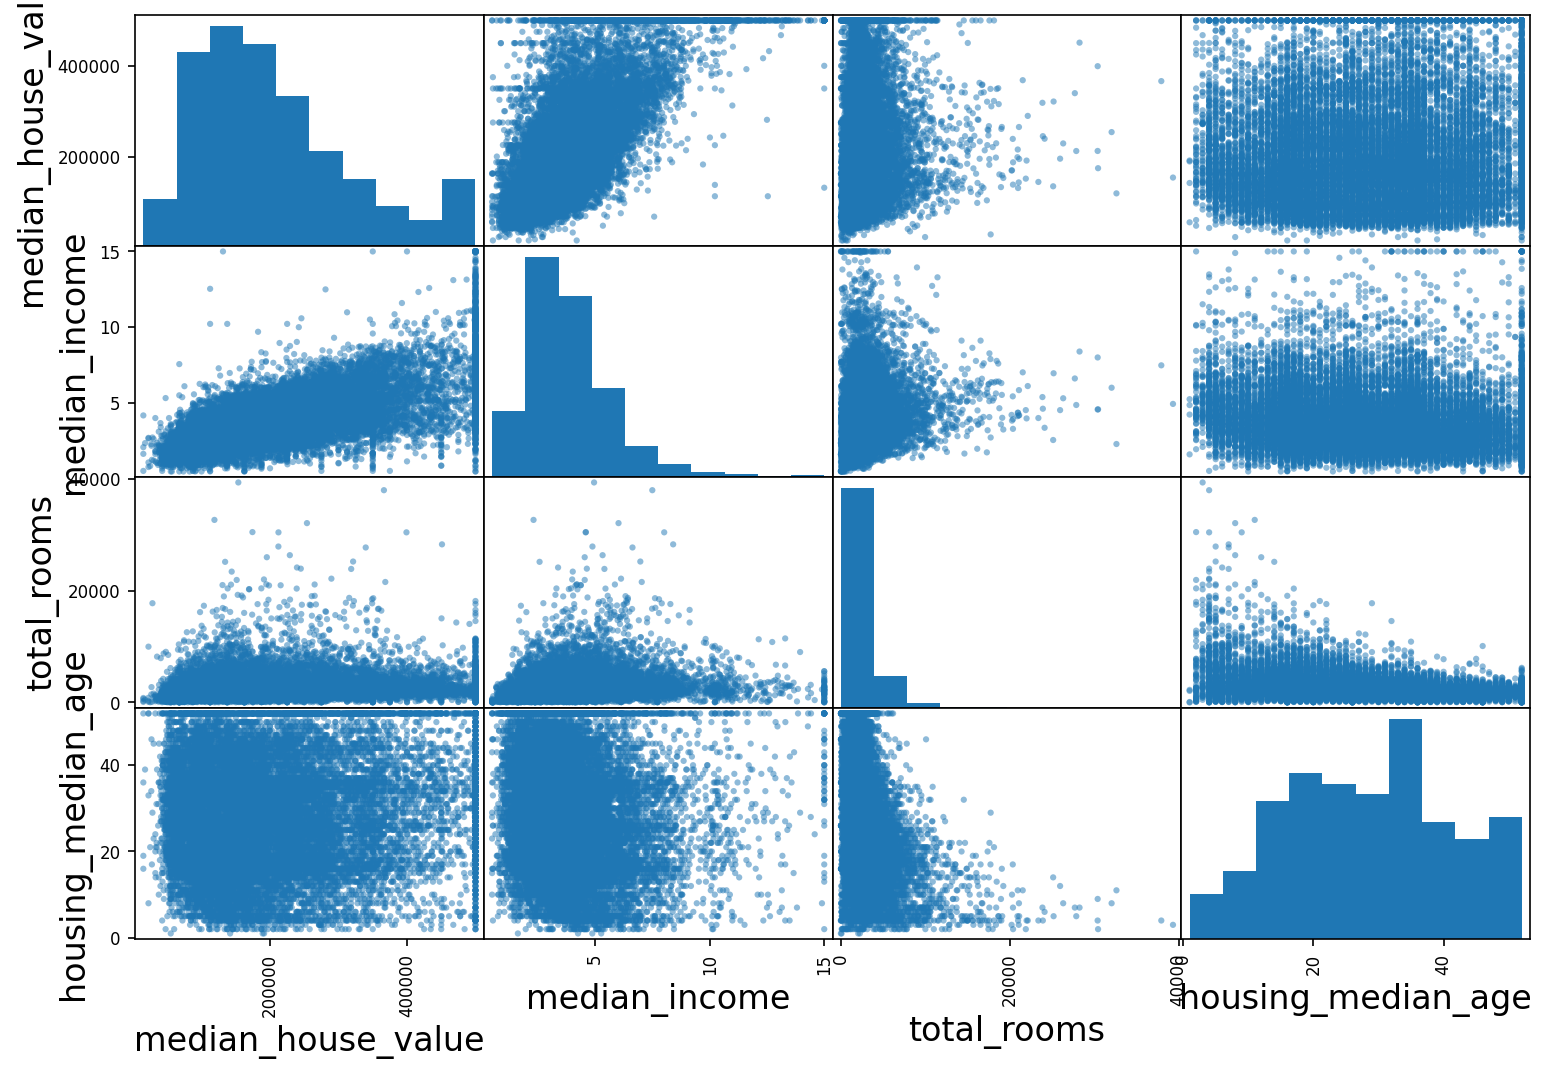

In [16]:

corr_matrix = data.corr()
print(corr_matrix) 

print(corr_matrix["median_house_value"].sort_values(ascending=False))

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))



# 2.multi-model comparison

In [17]:
# Define model evaluation metrics
def try_different_method(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    y_predict1 = model.predict(x_train)
    print('Training set evaluation metrics:')
    print('MSE values are: ', '%.4f'%float(mean_squared_error(y_train,y_predict1)))
    print('MAE values are: ', '%.4f'%float(mean_absolute_error(y_train,y_predict1)))
    print('RMSE values are:','%.4f'%float(np.sqrt(metrics.mean_squared_error(y_train, y_predict1))))
    print('MAPE values are:','%.4f'%float(np.mean(abs((y_train- y_predict1)/y_train)))) 
    print('R-Square values are: ', '%.4f'%float(metrics.r2_score(y_train, y_predict1)))
    
    print('Test set evaluation metrics:')
    print('MSE values are: ', '%.4f'%float(mean_squared_error(y_test,y_predict)))
    print('MAE values are: ', '%.4f'%float(mean_absolute_error(y_test,y_predict)))
    print('RMSE values are:','%.4f'%float(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))
    print('MAPE values are:','%.4f'%float(np.mean(abs((y_test- y_predict)/y_test)))) 
    print('R-Square values are: ', '%.4f'%float(metrics.r2_score(y_test, y_predict)))



In [18]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
model_lr1 = LogisticRegression()
model_lr = LinearRegression()
model_XGB = xgb.XGBRegressor(random_state=2022,
                            verbosity=0,
                             n_jobs=-1,
                             max_depth=4, 
                            learning_rate=0.1, 
                            n_estimators=100)

In [19]:
print('Linear regression model scores are as follows: ')
try_different_method(model_lr)
print('XGboost scores are as follows:')
try_different_method(model_XGB)
print('Logistic regression model scores are as follows:')
try_different_method(model_lr1)

Linear regression model scores are as follows: 
Training set evaluation metrics:
MSE values are:  4909707677.5743
MAE values are:  51054.6022
RMSE values are: 70069.3062
MAPE values are: 0.3053
R-Square values are:  0.6322
Test set evaluation metrics:
MSE values are:  4674983161.5884
MAE values are:  50312.9935
RMSE values are: 68373.8485
MAPE values are: 0.3003
R-Square values are:  0.6476
XGboost scores are as follows:
Training set evaluation metrics:
MSE values are:  2299687492.9946
MAE values are:  33302.0013
RMSE values are: 47955.0570
MAPE values are: 0.1882
R-Square values are:  0.8277
Test set evaluation metrics:
MSE values are:  2678138916.1819
MAE values are:  35570.2553
RMSE values are: 51750.7383
MAPE values are: 0.1988
R-Square values are:  0.7981
Logistic regression model scores are as follows:
Training set evaluation metrics:
MSE values are:  61987470550.7979
MAE values are:  201618.4127
RMSE values are: 248972.8309
MAPE values are: 1.5370
R-Square values are:  -3.6436
T

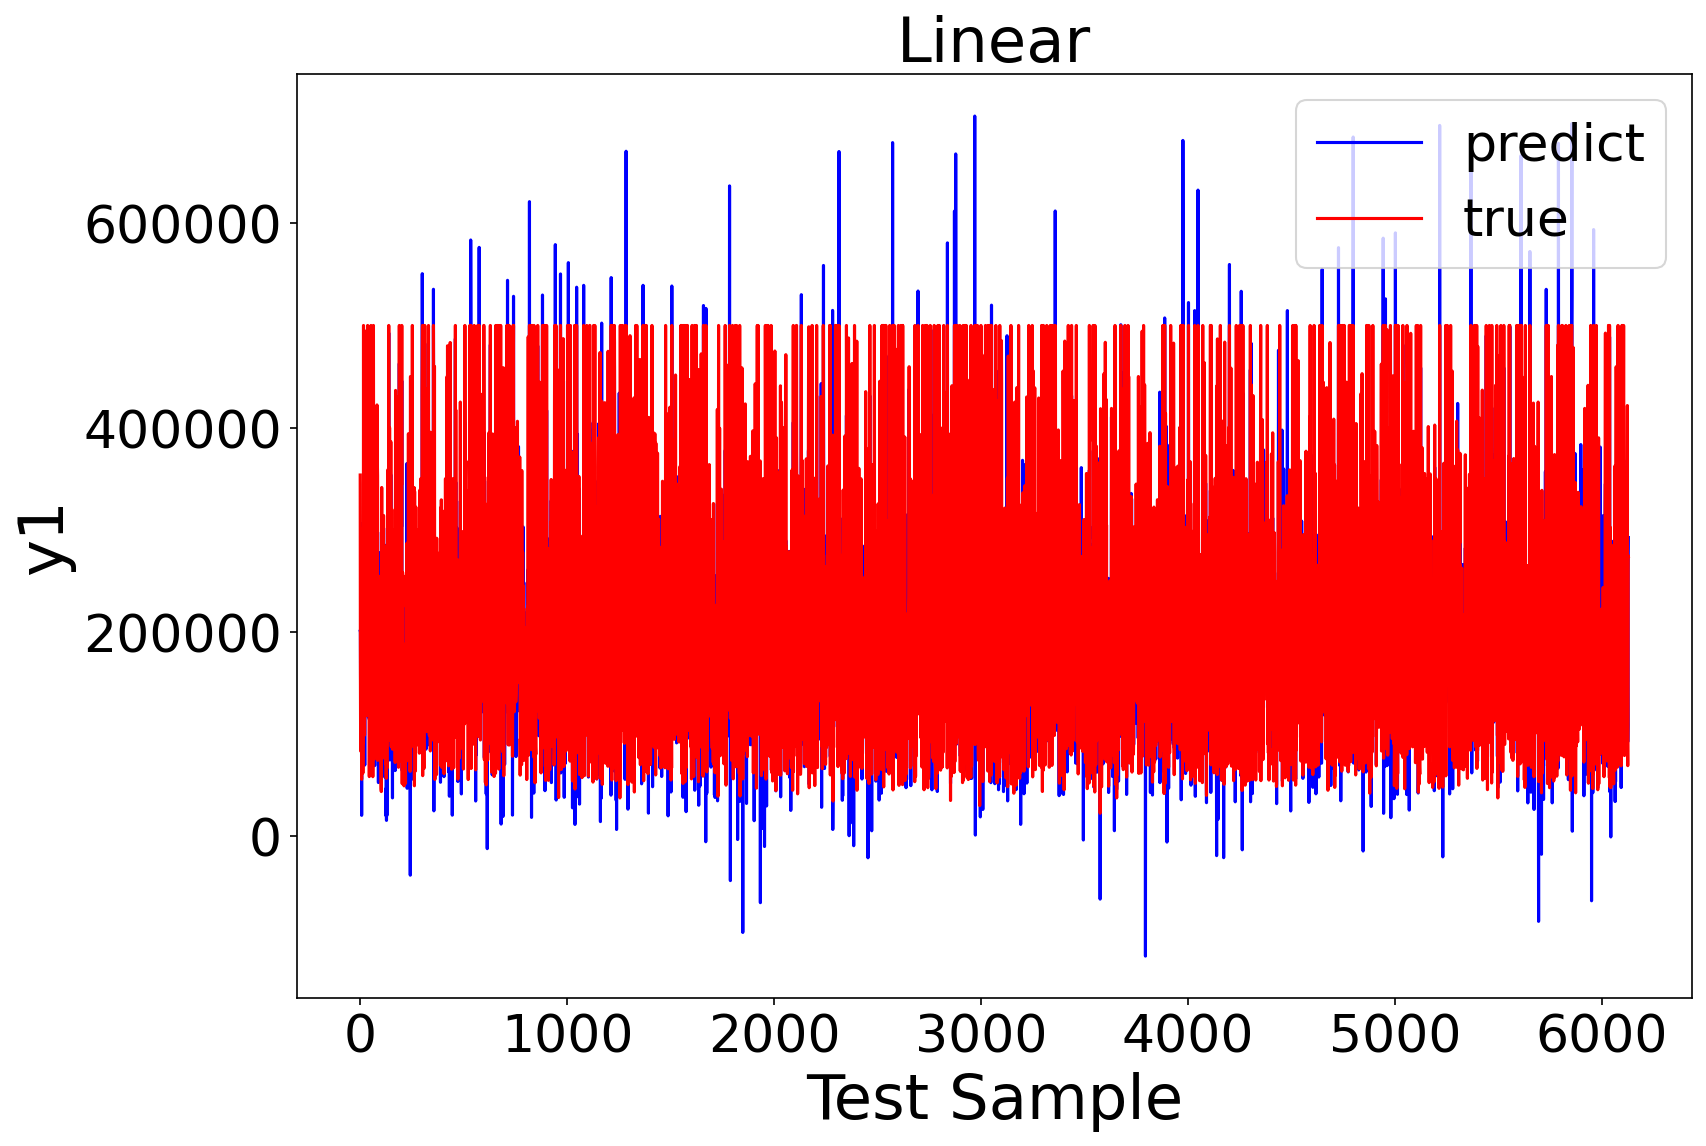

In [20]:
# Visualization of true and predicted values of linear regression, test set
y_test = y_test.reset_index(drop = True)
y_predict1 = model_lr.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict1,color = 'b',label = 'predict',markersize=8)
plt.plot(y_test,color = 'r',label = 'true',markersize=8)
plt.xlabel('Test Sample',fontsize=30)
plt.ylabel('y1',fontsize=30)
plt.title('Linear',fontsize=30)
# Coordinate axis font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25,loc='upper right')
plt.savefig('LR.png',dpi=300,bbox_inches = 'tight')

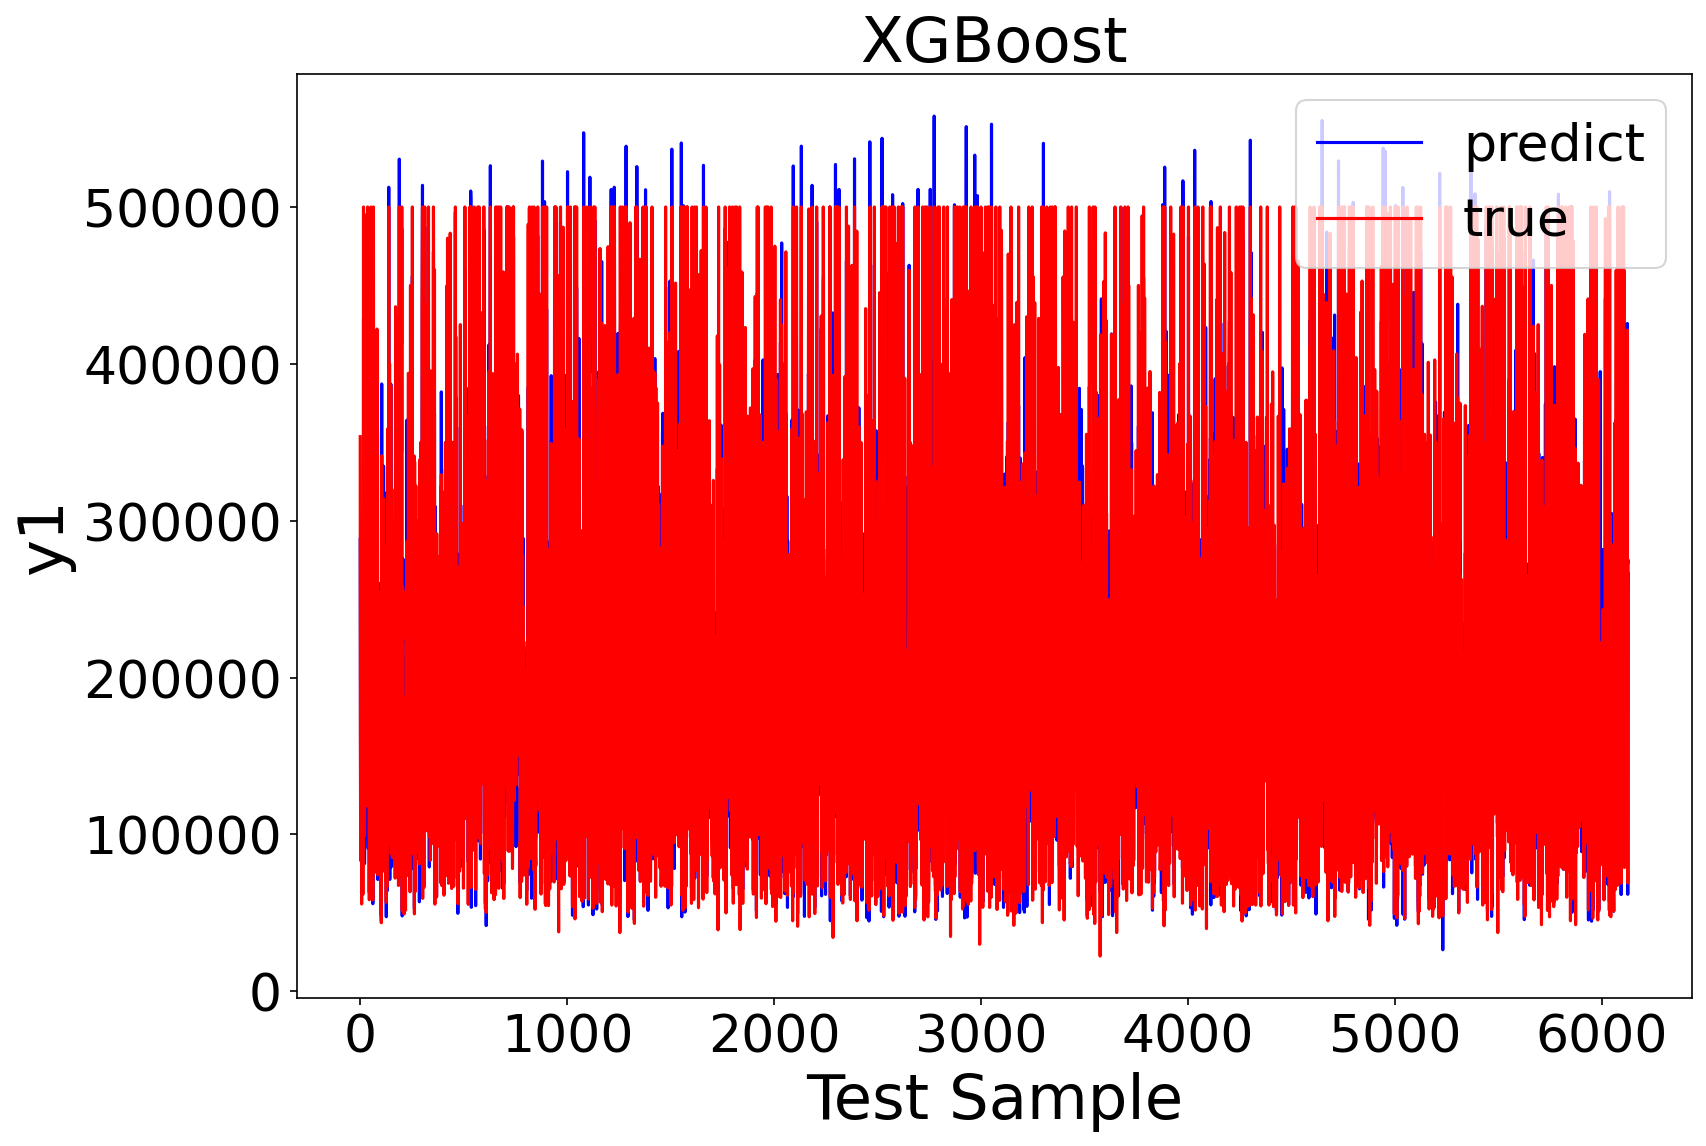

In [21]:

y_test = y_test.reset_index(drop = True)
y_predict2 = model_XGB.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict2,color = 'b',label = 'predict',markersize=8)
plt.plot(y_test,color = 'r',label = 'true',markersize=8)
plt.xlabel('Test Sample',fontsize=30)
plt.ylabel('y1',fontsize=30)
plt.title('XGBoost',fontsize=30)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25,loc='upper right')
plt.savefig('XGBoost.png',dpi=300,bbox_inches = 'tight')

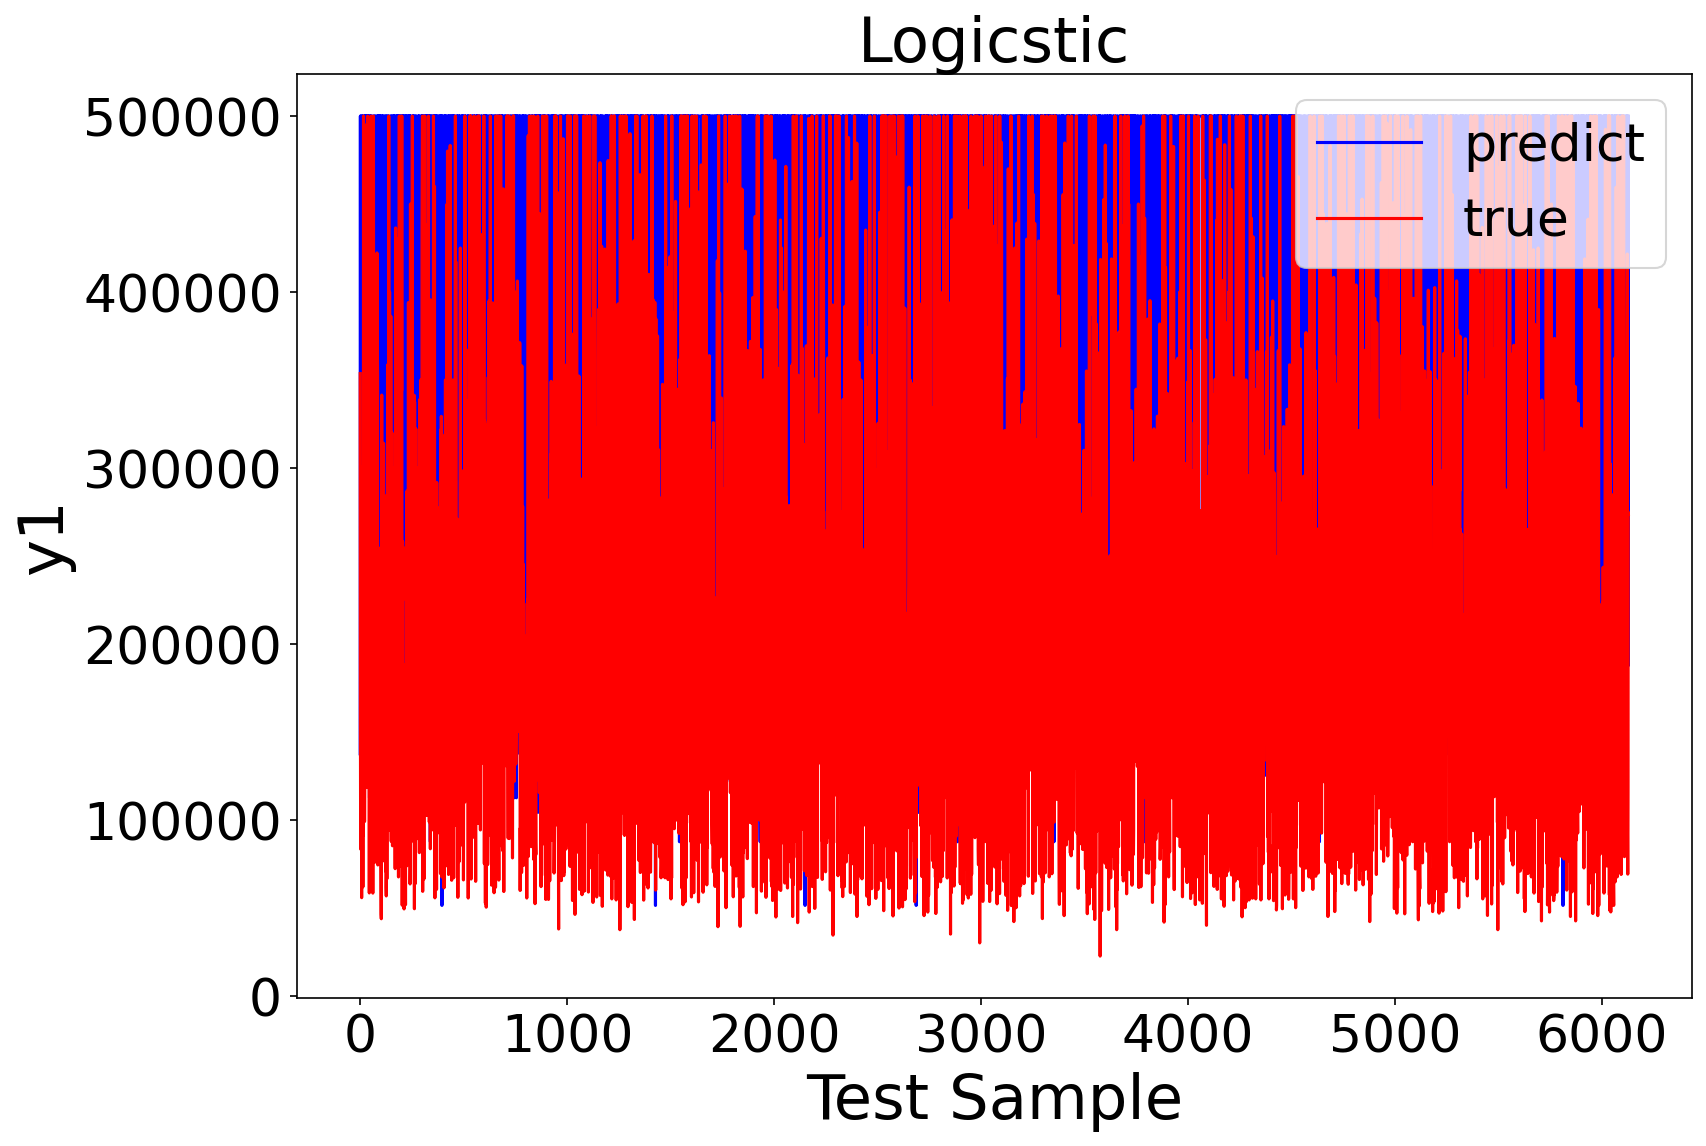

In [22]:
# Visualization of true and predicted values of logicstic regression, test set
y_test = y_test.reset_index(drop = True)
y_predict3 = model_lr1.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict3,color = 'b',label = 'predict',markersize=8)
plt.plot(y_test,color = 'r',label = 'true',markersize=8)
plt.xlabel('Test Sample',fontsize=30)
plt.ylabel('y1',fontsize=30)
plt.title('Logicstic',fontsize=30)
# Coordinate axis font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25,loc='upper right')
plt.savefig('LR1.png',dpi=300,bbox_inches = 'tight')

# 3. Bayesian-XGBoost

In [23]:
# XGB-Bayesian Tuning
from skopt import BayesSearchCV 
opt = BayesSearchCV(xgb.XGBRegressor(verbosity=0,
                              n_jobs=-1,
                                random_state=2022), 
                    { 
                    'max_depth': Integer(3, 5), 
                    'n_estimators': Integer(100, 150), 
                    'learning_rate': (0.1, 0.3)},
                    random_state=2022,
                    scoring='r2',
                    n_iter=20,
                    cv=3)
opt.fit(x_train, y_train)
print(f'best params: {opt.best_params_}')

best params: OrderedDict([('learning_rate', 0.20354328719043369), ('max_depth', 5), ('n_estimators', 150)])


In [24]:
# BSXGB test set scores
BSXGB = xgb.XGBRegressor(random_state=2022,
                            verbosity=0,
                             n_jobs=-1,
                             max_depth=5, 
                            learning_rate=0.2760184491191485, 
                            n_estimators=150)
print('The BSXGB model scores are as follows: ')
try_different_method(BSXGB)

The BSXGB model scores are as follows: 
Training set evaluation metrics:
MSE values are:  971756044.8625
MAE values are:  22073.9183
RMSE values are: 31173.0019
MAPE values are: 0.1258
R-Square values are:  0.9272
Test set evaluation metrics:
MSE values are:  2309707741.7927
MAE values are:  32181.0997
RMSE values are: 48059.4189
MAPE values are: 0.1786
R-Square values are:  0.8259


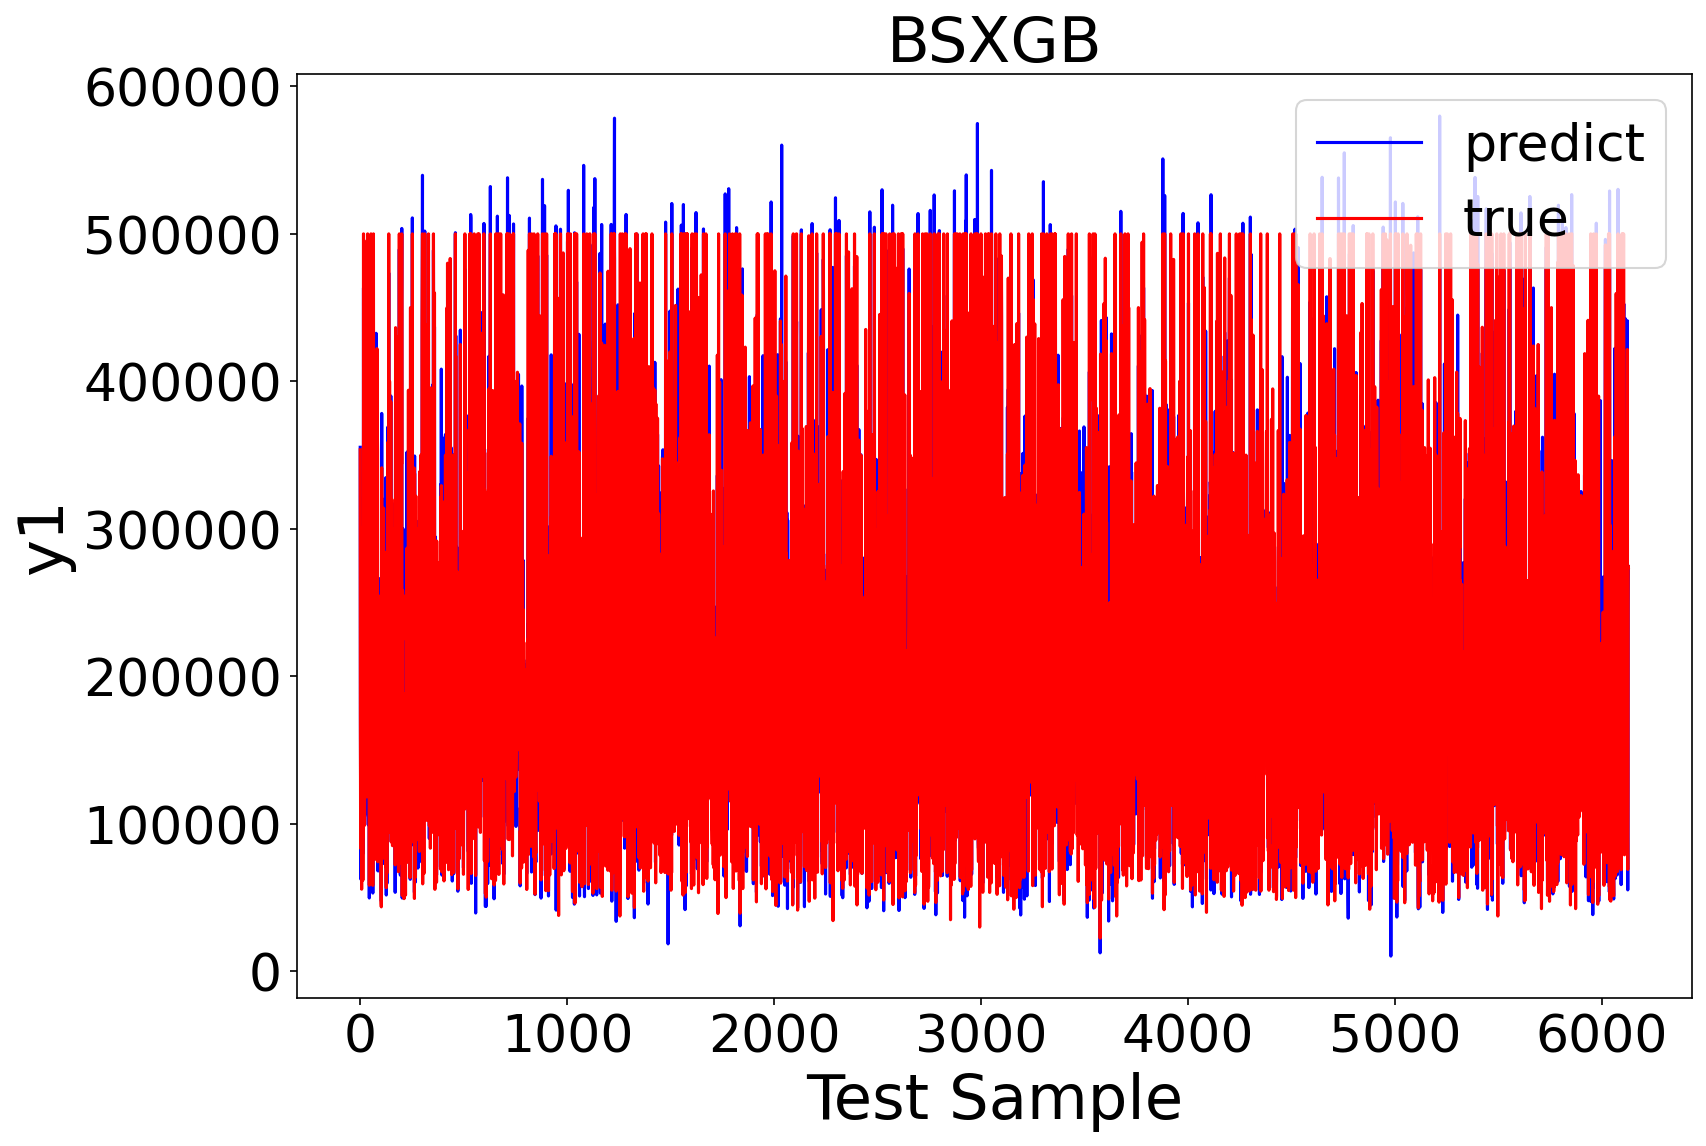

In [25]:
# Visualization of BSXGB true and predicted values, test set
y_test = y_test.reset_index(drop = True)
y_predict4 = BSXGB.predict(x_test)
plt.figure(figsize = (12,8))
plt.plot(y_predict4,color = 'b',label = 'predict',markersize=8)
plt.plot(y_test,color = 'r',label = 'true',markersize=8)
plt.xlabel('Test Sample',fontsize=30)
plt.ylabel('y1',fontsize=30)
plt.title('BSXGB',fontsize=30)
# Coordinate axis font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25,loc='upper right')
plt.savefig('BSXGB.png',dpi=300,bbox_inches = 'tight')

In [26]:
y_pred = pd.DataFrame(y_predict4,columns=['y_pred'])
aa = pd.concat([y_pred,y_test],axis=1)
aa.to_csv('BSXGB.csv',index=False)

# 4.SHAP

In [27]:
# Optimal model-SHAP, right mouse button to manually save HD DPI=300 images
# BSXGB
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # Modify image resolution
import shap # 0.39.0
shap.initjs()
explainer = shap.Explainer(BSXGB) # Enter your model
shap_values = explainer(x_test)# Input test set characteristics

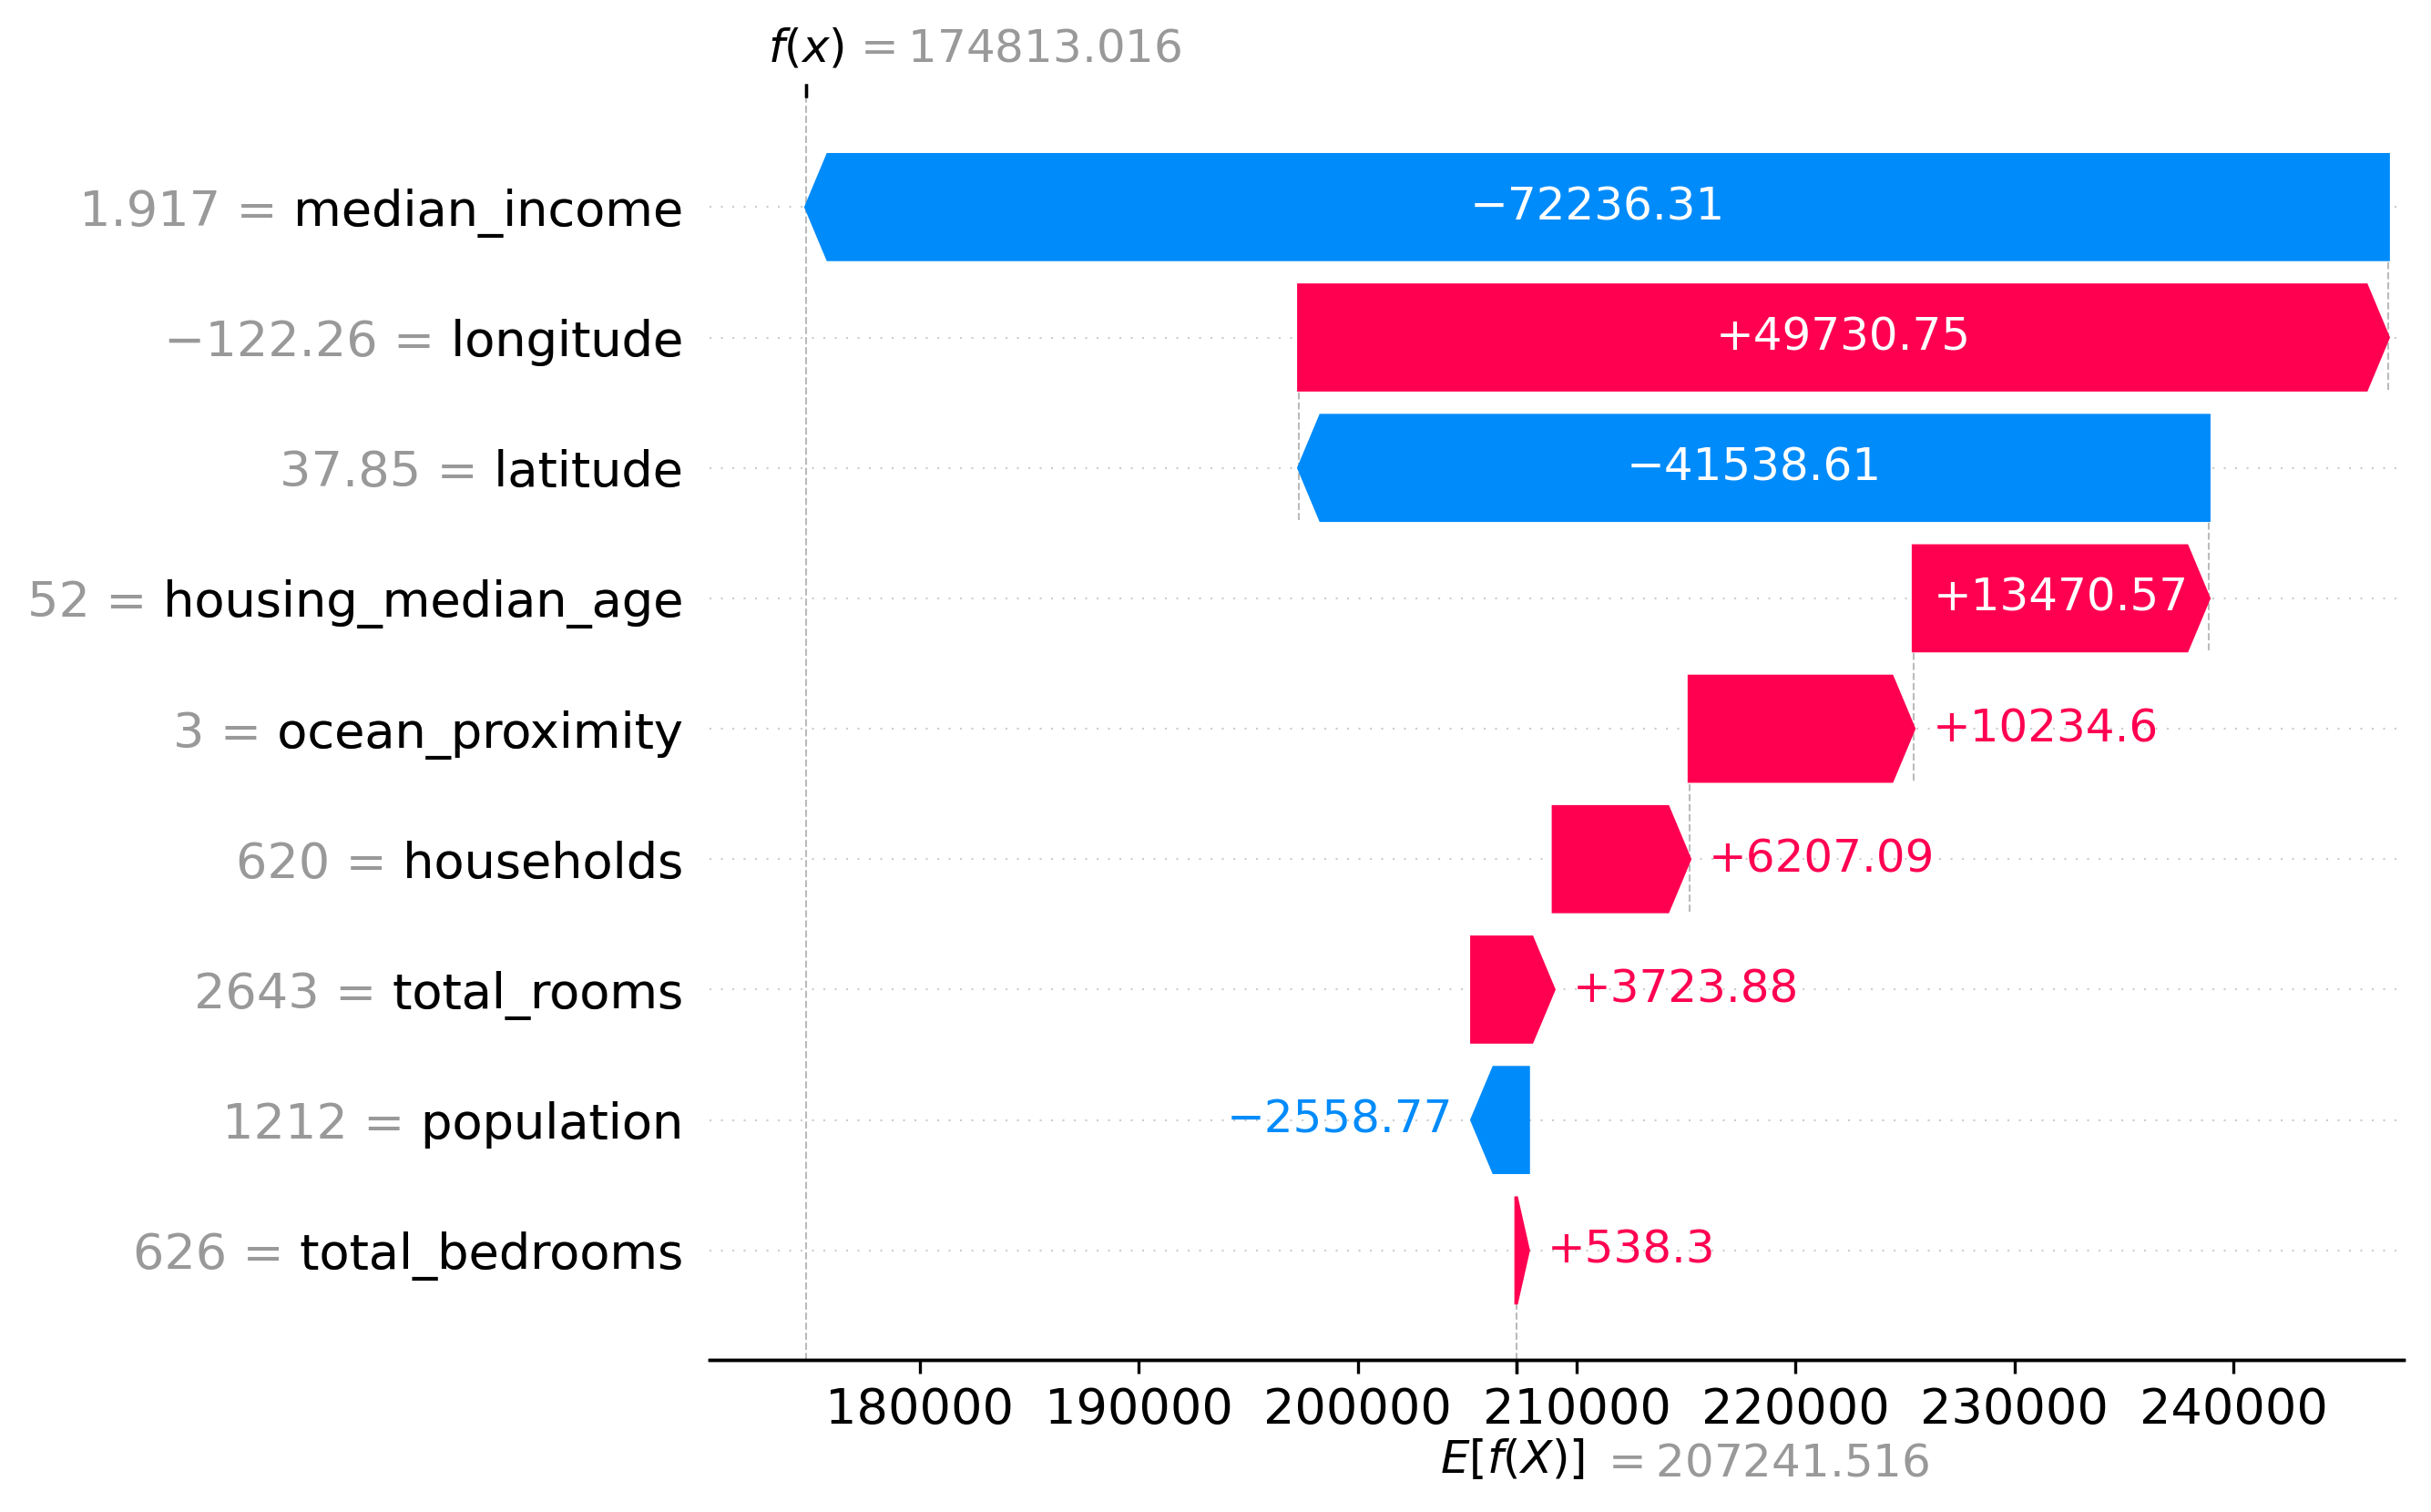

In [28]:
#[Micro] Single-sample feature impact map I: waterfall
shap.plots.waterfall(shap_values[1],max_display=50) # Test set 2nd sample

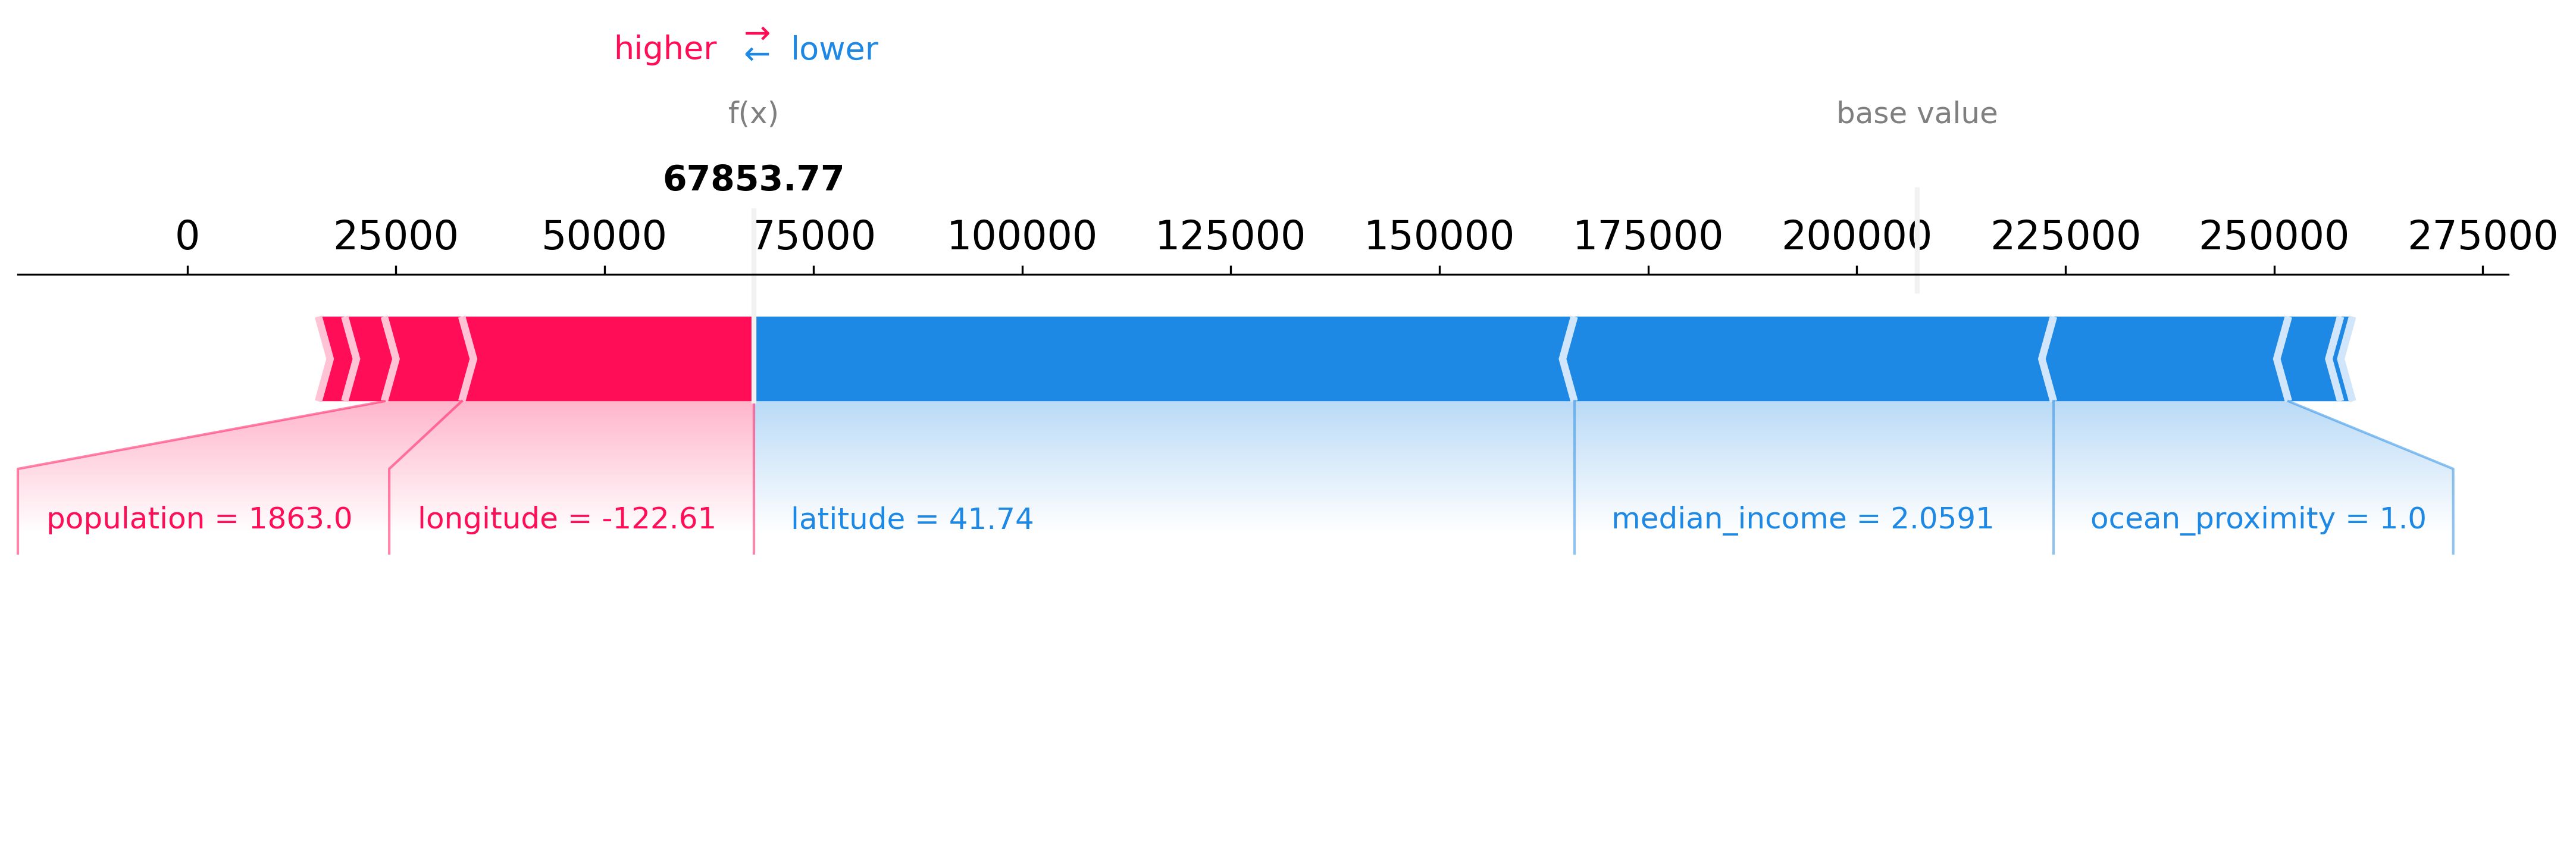

In [29]:
# Force plot,[micro] Single-sample feature impact plot II: force plot
shap.plots.force(shap_values[7],matplotlib=True,figsize=(18, 4))# Sample 8 of the test set

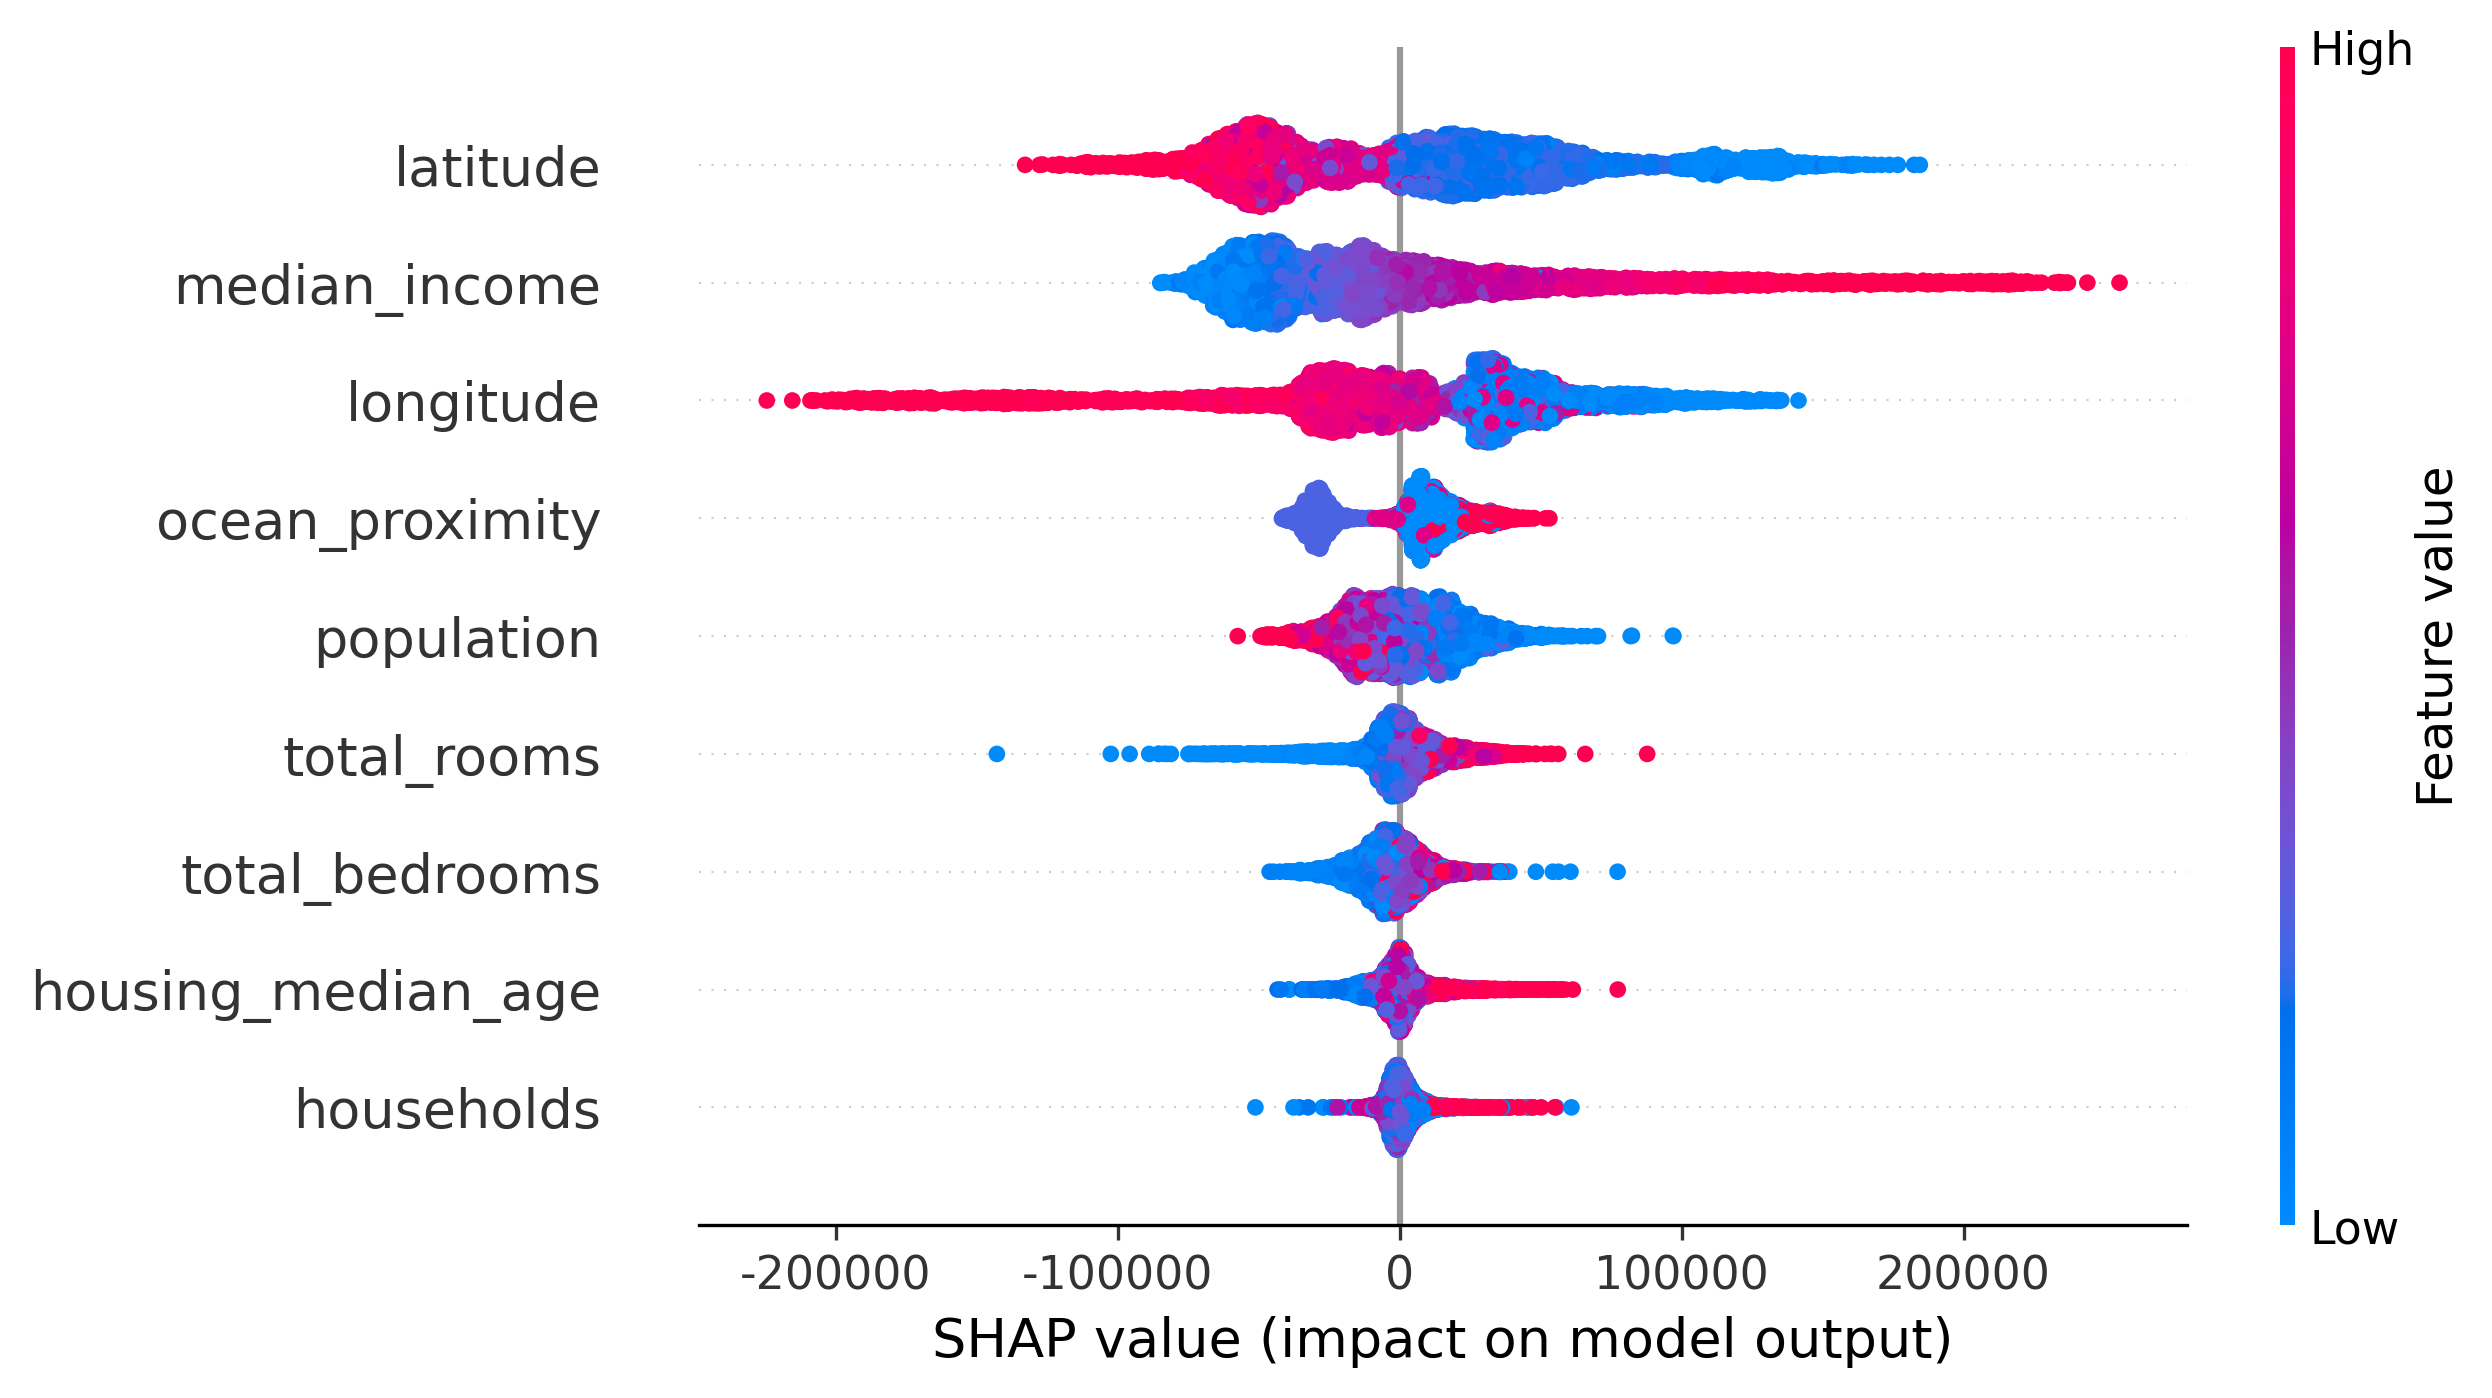

In [30]:
# [macro] Feature density scatter plot: beeswarm
shap.plots.beeswarm(shap_values,max_display=50)

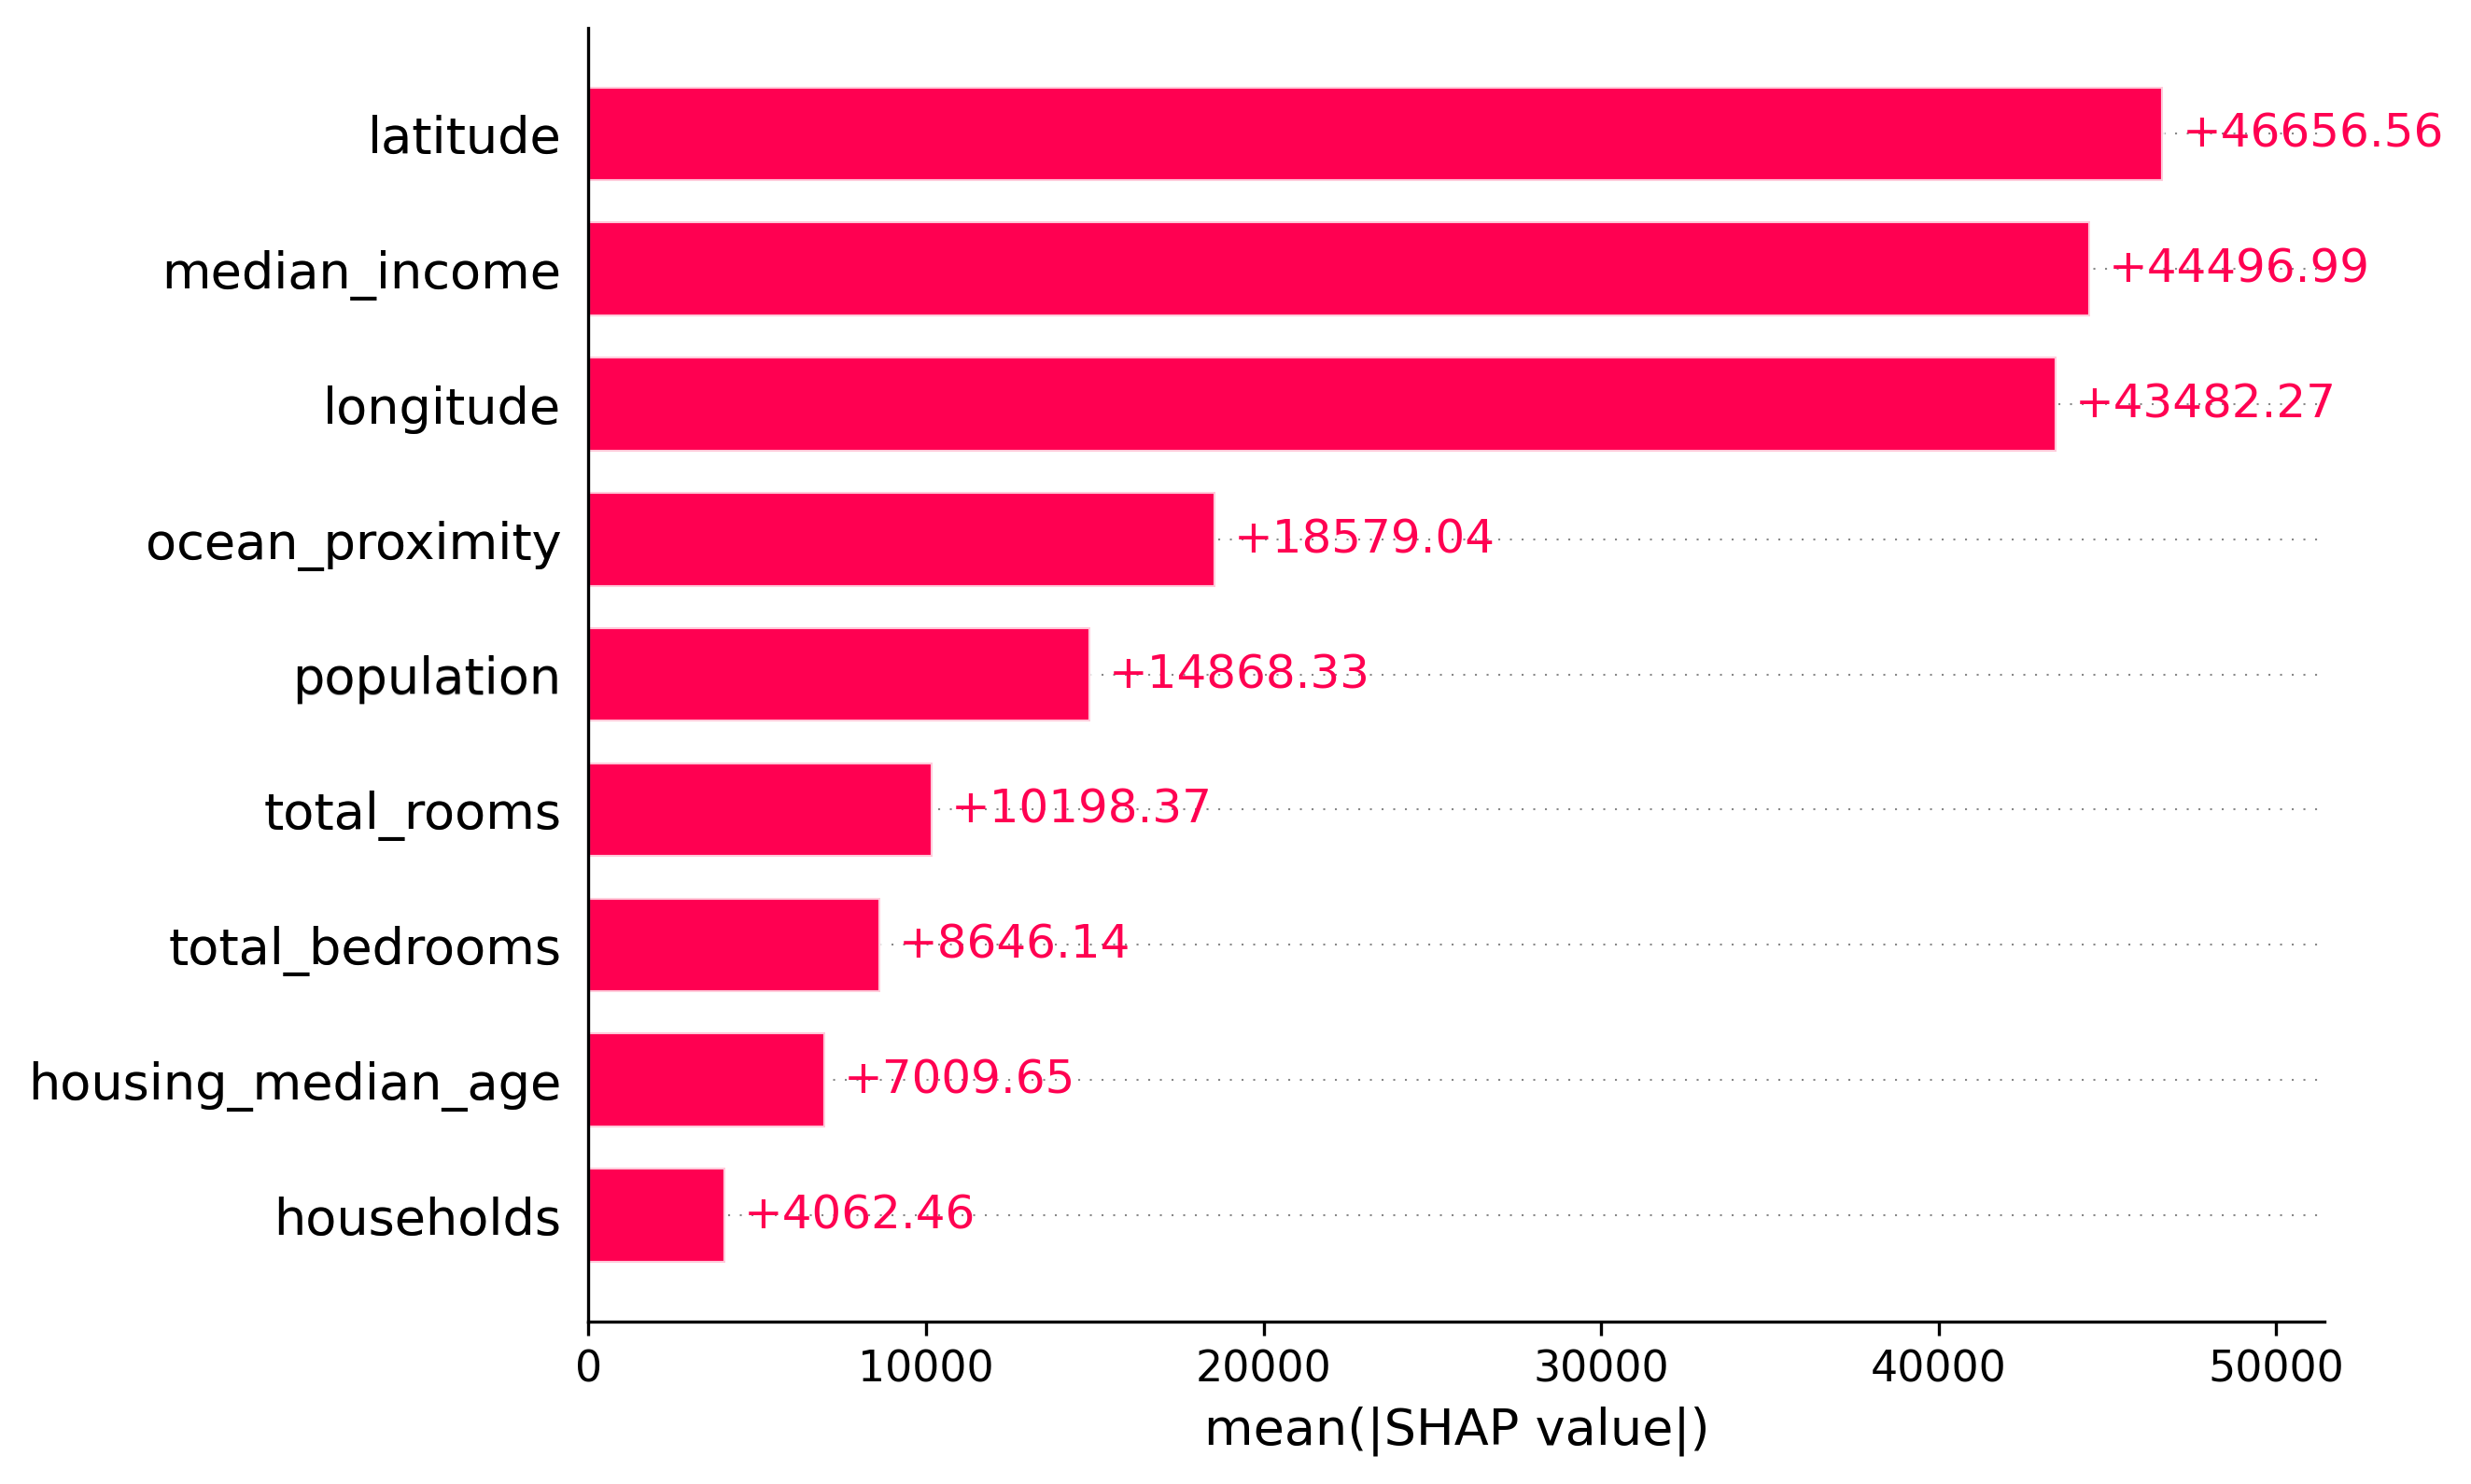

In [31]:
# [Macro] Feature importance SHAP value
shap.plots.bar(shap_values,max_display=50)

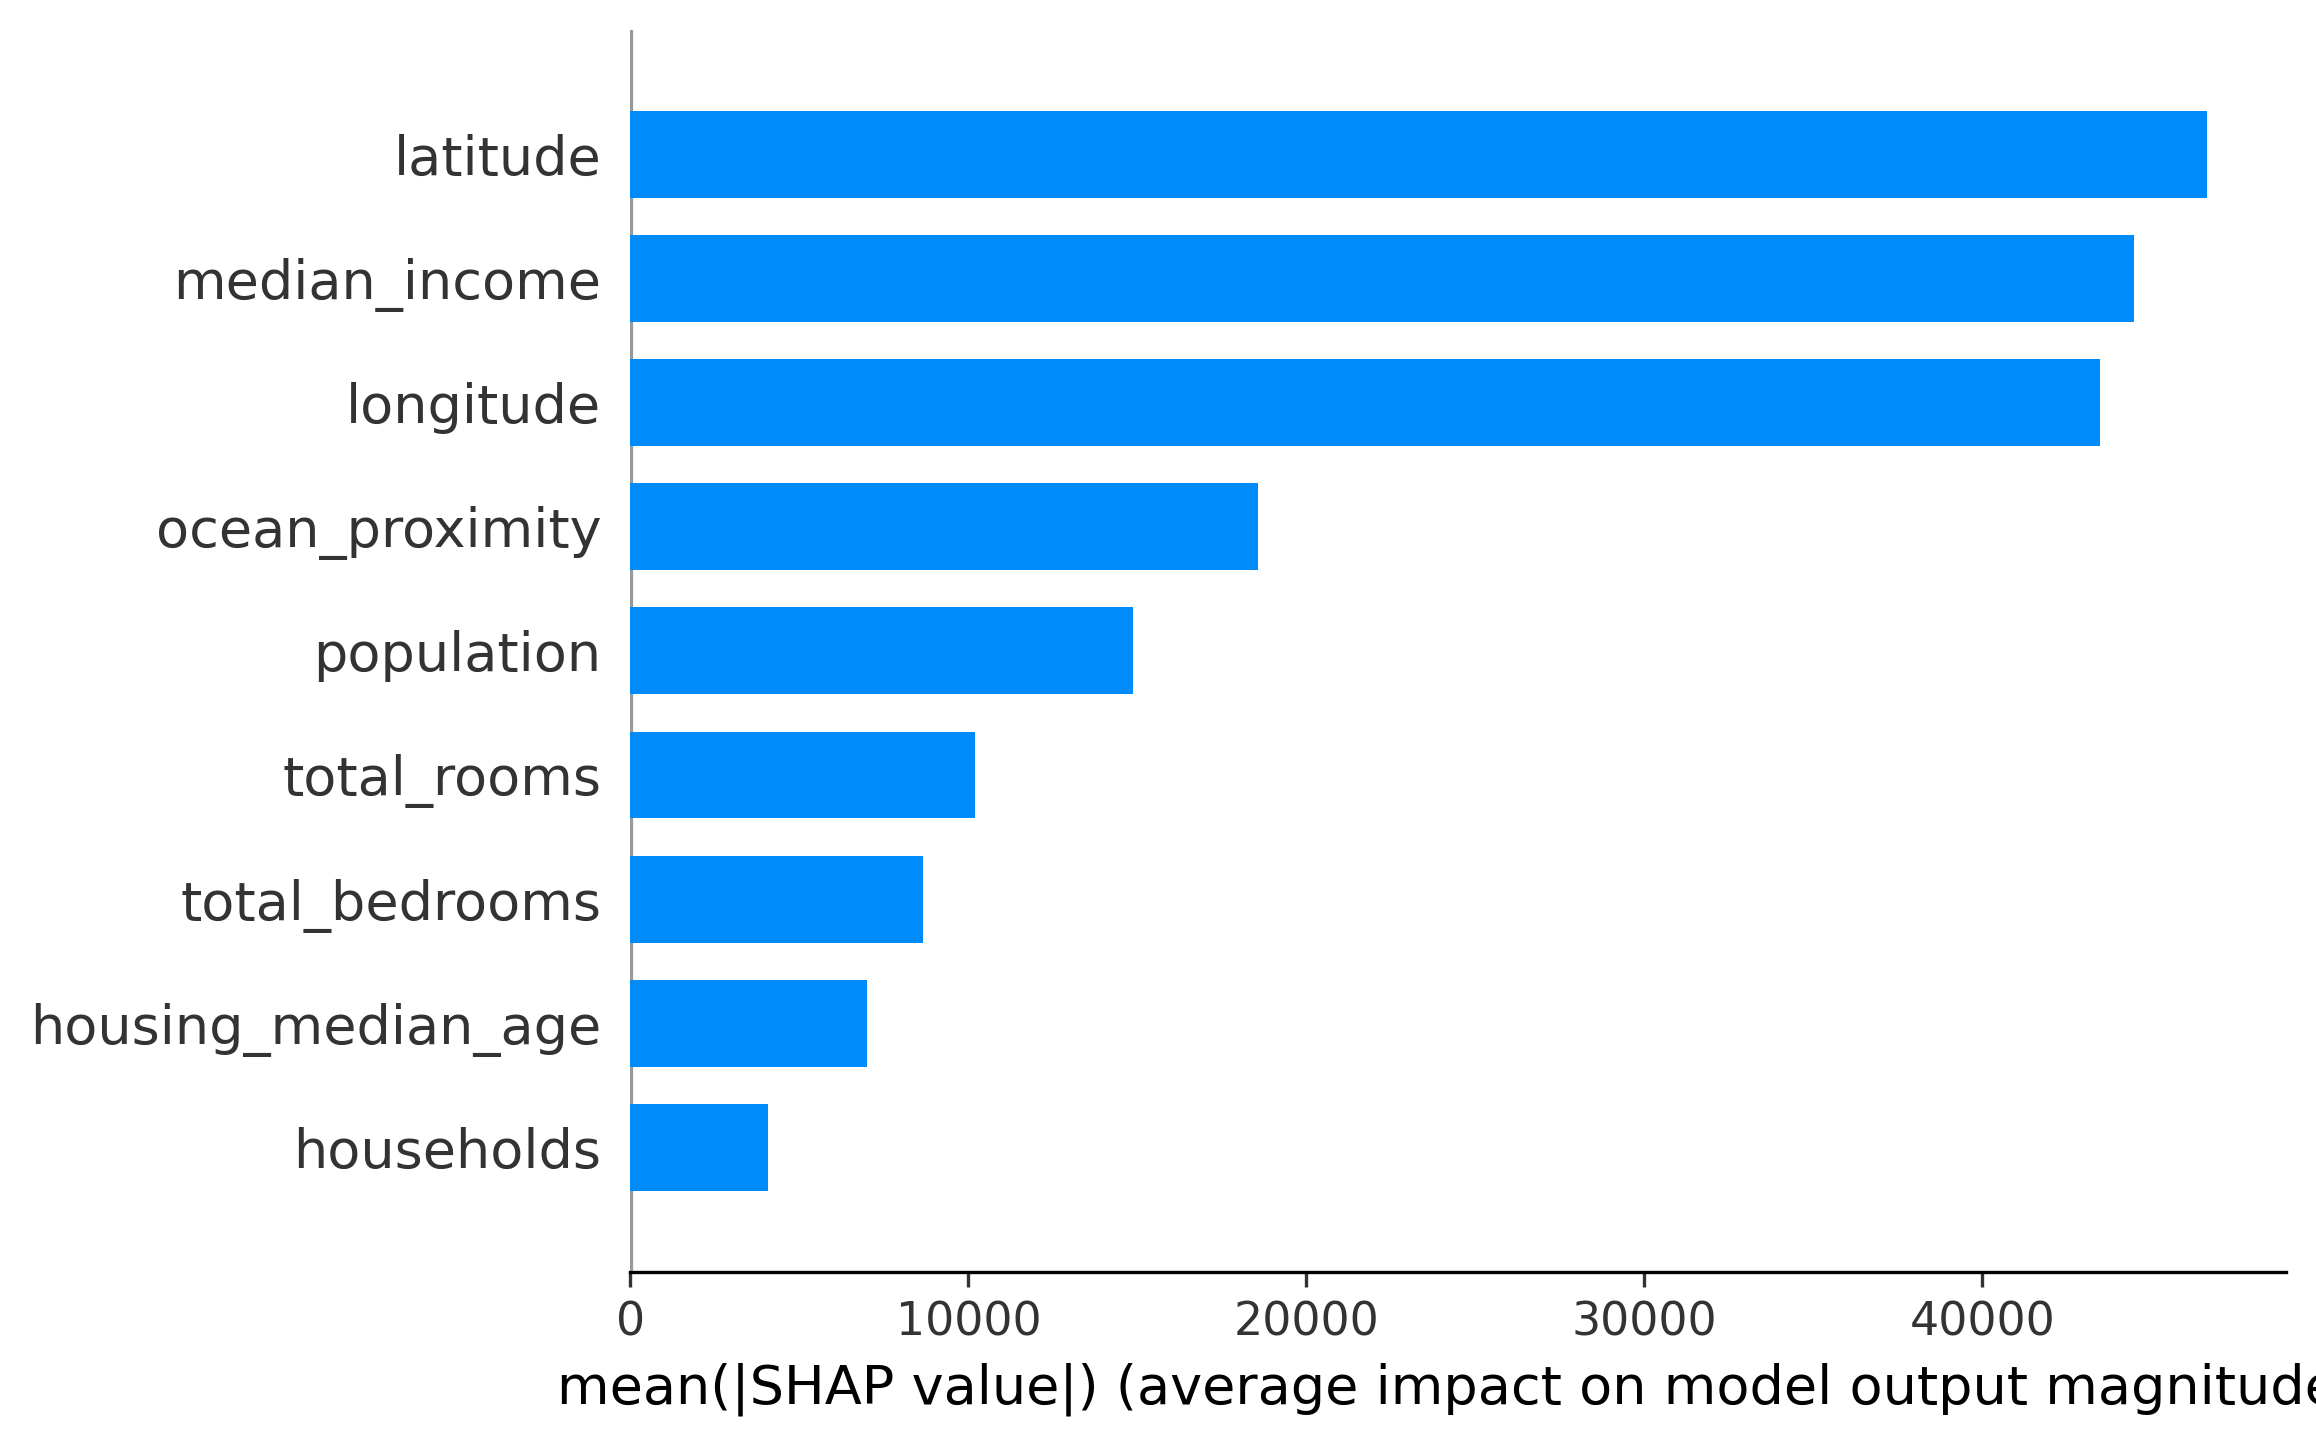

In [32]:
# summary
shap.summary_plot(shap_values, x_test,plot_type="bar", show = False)